# Preprocessing, Visualisation, Analysis

# Import dataset

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
tf.random.set_seed(11)

In [38]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [39]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ADA-Assessment-main/Preprocessing/train_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

,BTC_Close,BTC_Open,BTC_High,BTC_Low,BTC_Volume,BTC_transactions,BTC_interesst,gold_Open,gold_Close,gold_High,...,oil_Open,oil_Close,oil_High,oil_Low,oil_Volume,VIX_Open,VIX_Close,VIX_High,VIX_Low,SP500_Close index
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-01,376.132180,376.851000,381.582000,374.492000,0.06,79098,3,1160.0,1332.50,1220.4,...,66.000000,69.000000,69.540001,63.720001,504122,14.16,14.29,14.75,13.94,2053.44
2014-12-02,377.862000,376.132180,382.602000,376.082000,15.01,99419,3,1212.3,1314.70,1212.3,...,69.239998,66.879997,69.320000,66.669998,360300,14.10,12.85,14.17,12.85,2066.55
2014-12-03,382.452000,377.862000,383.719000,377.853110,0.55,99419,3,1198.1,1325.80,1213.7,...,67.599998,67.379997,68.230003,66.800003,293483,12.75,12.47,12.88,12.21,2074.33
2014-12-04,376.382000,382.452000,383.008000,373.913200,0.01,99419,3,1208.2,1324.20,1213.0,...,67.400002,66.809998,68.220001,66.089996,237011,12.70,12.38,13.23,12.09,2071.92
2014-12-05,368.361800,376.382000,378.106000,365.543000,0.00,90900,3,1203.1,1310.80,1206.0,...,66.800003,65.839996,66.889999,65.169998,276529,12.08,11.82,12.28,11.53,2075.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08,9900.678867,9371.679970,9958.733998,9065.921045,25608.21,341986,19,1743.5,1713.90,1752.7,...,23.350000,24.740000,24.990000,23.260000,205181,30.14,27.98,30.39,27.89,2929.80
2020-05-11,8786.655182,9616.377064,9650.018603,8166.492188,36356.85,286789,19,1727.7,1698.00,1734.2,...,24.490000,24.139999,25.580000,23.670000,179591,28.46,27.57,31.46,26.97,2930.19
2020-05-12,8608.125245,8733.637943,9176.186390,8206.331505,19825.54,286789,19,1721.1,1706.80,1737.2,...,24.490000,25.780001,26.230000,24.219999,212335,28.47,33.04,33.04,26.00,2870.12


In [40]:
df.columns

Index(['BTC_Close', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Volume',
       'BTC_transactions', 'BTC_interesst', 'gold_Open', 'gold_Close',
       'gold_High', 'gold_Low', 'gold_Volume', 'gold_Chg%', 'oil_Open',
       'oil_Close', 'oil_High', 'oil_Low', 'oil_Volume', 'VIX_Open',
       'VIX_Close', 'VIX_High', 'VIX_Low', 'SP500_Close index'],
      dtype='object')

In [41]:
#from initial corr heatmap, corr ~1
df= df.drop(['BTC_Open', 'BTC_High', 'BTC_Low', 'gold_Open','gold_High', 'gold_Low',
             'oil_Open', 'oil_High', 'oil_Low', 'VIX_Open', 'VIX_High', 'VIX_Low'], axis=1)

# Functions for LSTM

In [42]:
#Initialise
all_result={}
all_history={}
all_rmse={}

In [43]:
#Prepare data (Rolling widow)
def split_data(window_size, data_X, data_y):
    X = []
    y = []
    for i in range(len(data_X)-window_size):
      X.append(data_X[i:i+window_size,0:])
      y.append(data_y[i+window_size,0])
    return np.array(X), np.array(y)

In [44]:
def perform_pca(train_data, test_data):
  #remember to standardise before pca
  #select n_component to have explained_variance between 95–99%
  pca = PCA(n_components=0.95) #0.95
  train_data = pca.fit_transform(train_data)
  test_data = pca.transform(test_data)
  return train_data, test_data

In [45]:
# Build the LSTM model
def build_model(window_size, data):
  model = Sequential()
  model.add(LSTM(64, return_sequences=True, input_shape= (window_size, data.shape[2])))
  model.add(LSTM(32, return_sequences = False))
  model.add(Dense(25))
  model.add(Dense(1))
  # Compile model
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model

In [46]:
def train_test_model(df_train, df_test, target, features, pca, window_size, batch_size, epochs):
  X_train, X_test = df_train[features], df_test[features]
  y_train, y_test = df_train[[target]], df_test[[target]]
  
  #standardise before any other transformation action
  #can use just one scaler for X and y, it only applies to each feature, but this is clearer
  X_scaler = StandardScaler().fit(X_train)
  y_scaler = StandardScaler().fit(y_train)
  X_train = X_scaler.transform(X_train)
  X_test = X_scaler.transform(X_test)
  y_train = y_scaler.transform(y_train)
  y_test = y_scaler.transform(y_test)
  
  if pca:
    X_train, X_test = perform_pca(X_train, X_test)
  
  X_train, y_train = split_data(window_size, X_train, y_train)
  X_test, y_test = split_data(window_size, X_test, y_test)

  # reshaping array
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
  y_train = y_train[:, np.newaxis]     
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
  y_test = y_test[:, np.newaxis]

  this_model= build_model(window_size, X_train)

  #Train
  history = this_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test),verbose=1)

  #Prediction
  y_pred = this_model.predict(X_test)

  y_pred =  pd.DataFrame(y_scaler.inverse_transform(y_pred), index=df_test.index[window_size:]) 
  y_actual=  pd.DataFrame(y_scaler.inverse_transform(y_test), index=df_test.index[window_size:]) 
  # Get the root mean squared error (RMSE)
  rmse = np.sqrt(np.mean(((y_pred[0] - y_actual[0]) ** 2)))
  del this_model
  tf.keras.backend.clear_session()
  return y_pred, history, rmse

In [47]:
def plot_prediction(all_result,df_test,targets):
  
  for target in targets:
    plt.figure(figsize=(25,10))
    plt.plot(df_test[[target]], label='Validation Data', linewidth=1)  
    for x in all_result:
      if target in all_result[x]:
        plt.plot(all_result[x][target], label=x, linewidth=1)
    # Add a legend and axis labels
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.title(target + " Prediction vs Actual")
    plt.show()

def plot_history(all_history,targets):
  for target in targets:
    for x in all_history:
      if target in all_history[x]:
        plt.figure(figsize=(10,6))
        plt.plot(all_history[x][target].history['loss'], label='Training Loss', linewidth=1)
        plt.plot(all_history[x][target].history['val_loss'], label='Validation Loss', linewidth=1)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title(target +" - " +x)
        plt.show()

# Feature Generation 
Some of the ways we do to improve the performance is to create other features from the existing dataset. Some commonly used features in time series data are: moving averages, momentum indicators indicators such as RSI, MACD.

In [48]:
# Create featues indicating dayofweek and month
df['dayofweek']= df.index.dayofweek
df['month'] = df.index.month

In [49]:
#MACD - Moving Average Convergence/Divergence

#The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA. 
#A 9-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line
#It can function as a trigger for buy or sell signals.

# calculate 12-day and 26-day EMA
ema_12 = df['BTC_Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['BTC_Close'].ewm(span=26, adjust=False).mean()
# calculate MACD line
macd = ema_12 - ema_26
# calculate 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal
df['BTC_MACD Histogram'] = histogram

# Repeat
ema_12 = df['gold_Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['gold_Close'].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal
df['gold_MACD Histogram'] = histogram

# Repeat
ema_12 = df['oil_Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['oil_Close'].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal
df['oil_MACD Histogram'] = histogram

# Repeat
ema_12 = df['VIX_Close'].ewm(span=12, adjust=False).mean()
ema_26 = df['VIX_Close'].ewm(span=26, adjust=False).mean()
macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal
df['VIX_MACD Histogram'] = histogram

In [50]:
#RSI Relative Strength Index
n=14
# calculate the difference between each closing price and the previous closing price
delta = df['BTC_Close'].diff()
# calculate the gains and losses 
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength
rs = avg_gain / avg_loss
# calculate the RSI
df['BTC_RSI'] = 100 - (100 / (1 + rs))

#Repeat
n=14
delta = df['gold_Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
rs = avg_gain / avg_loss
df['gold_RSI'] = 100 - (100 / (1 + rs))

#Repeat
n=14
delta = df['oil_Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
rs = avg_gain / avg_loss
df['oil_RSI'] = 100 - (100 / (1 + rs))

#Repeat
n=14
delta = df['VIX_Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
rs = avg_gain / avg_loss
df['VIX_RSI'] = 100 - (100 / (1 + rs))

In [51]:
df = df.dropna()

In [52]:
# #volatility measures?

In [53]:
# #Come up with other features that can be useful for prediction
# # df['lag1'] = df['close'].shift(1)
# # df['lag2'] = df['close'].shift(2)
# # df['lag3'] = df['close'].shift(3)# Compute a 7-day moving average of the closing price

# #moving average
# df['BTC_a7'] = df['BTC_Close'].rolling(window=7).mean()
# df['gold_a7'] = df['gold_Close'].rolling(window=7).mean()
# df['oil_a7'] = df['oil_Close'].rolling(window=7).mean()
# df['vix_a7'] = df['VIX_Close'].rolling(window=7).mean()
# df['SP500_a7'] = df['SP500_Close index'].rolling(window=7).mean()

# Correlations between variables

<Axes: >

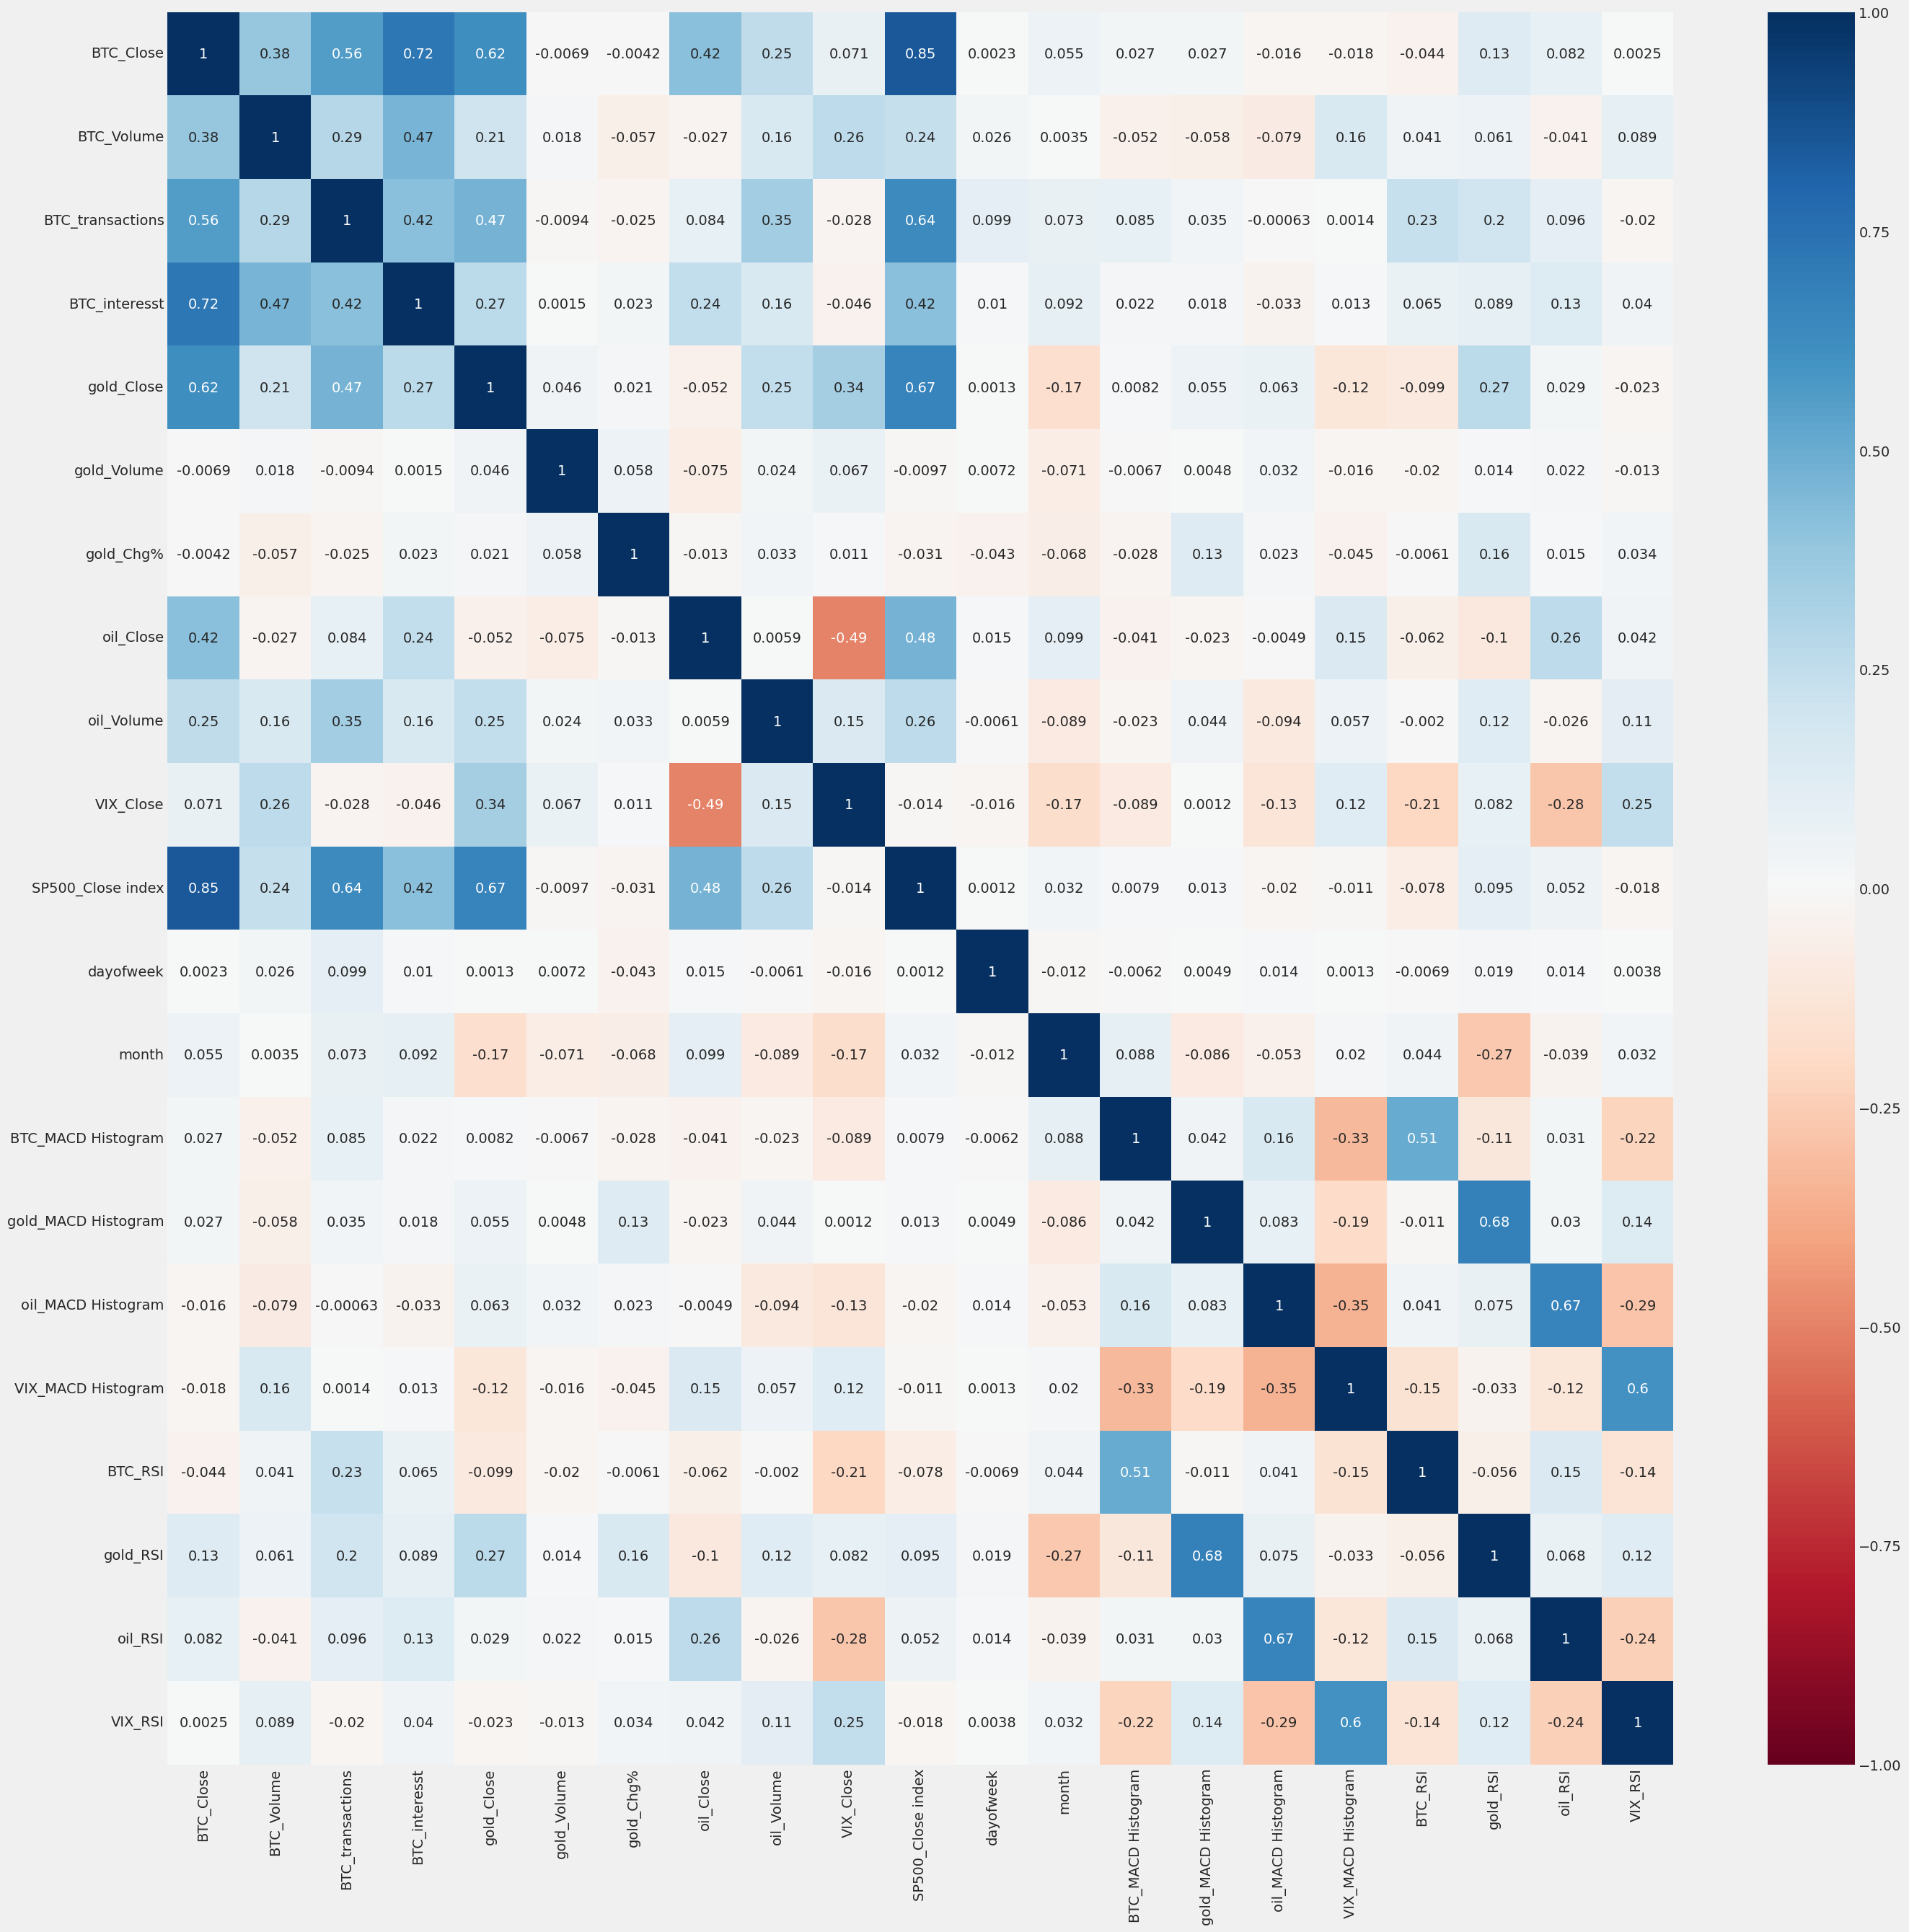

In [54]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)

From the heatmap, we can see that 'Gold Change', 'Gold Volume' have very low correlation to any other variables

# Feature Selection

In [55]:
df= df.drop(['gold_Volume', 'gold_Chg%'], axis=1)
df= df.drop(['dayofweek'], axis=1)

In [56]:
target_features={}
target_features["BTC_Close"]= ['BTC_Close', 'BTC_Volume', 'BTC_transactions', 'BTC_interesst', 'gold_Close', 'oil_Close', 'oil_Volume', 'SP500_Close index', 'gold_RSI']
target_features["oil_Close"]=['BTC_Close', 'BTC_interesst', 'oil_Close', 'VIX_Close', 'SP500_Close index', 'VIX_MACD Histogram', 'oil_RSI', 'gold_RSI']
target_features["gold_Close"]=['BTC_Close', 'BTC_Volume', 'BTC_transactions', 'BTC_interesst', 'gold_Close', 'oil_Volume', 'VIX_Close', 'SP500_Close index', 'month', 'VIX_MACD Histogram', 'gold_RSI']
target_features["VIX_Close"]=['BTC_Volume', 'gold_Close', 'oil_Close', 'oil_Volume', 'VIX_Close', 'month', 'oil_MACD Histogram', 'VIX_MACD Histogram', 'BTC_RSI', 'oil_RSI', 'VIX_RSI', 'gold_RSI']
target_features["SP500_Close index"]=['BTC_Close', 'BTC_Volume', 'BTC_transactions', 'BTC_interesst', 'gold_Close', 'oil_Close', 'oil_Volume', 'SP500_Close index']

# Split train and test data

In [57]:
# Split the data into train and test (7:3)
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False) #shuffle=False ensures data is split chronologically

# BTC_Close Prediction

## Univariate Prediction with LSTM Model

In [ ]:
#Only close price of BTC
targets=["BTC_Close"]
target_result={}
target_history={}
target_rmse={}
window_size=65
batch_size=30
epochs=30
pca=False
for target in targets:
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, [target], pca, window_size, batch_size, epochs) 
all_result['Univariate'] = target_result
all_history['Univariate']=target_history
all_rmse['Univariate']=target_rmse

Epoch 1/30
29/29 [==============================] - 8s 120ms/step - loss: 0.2455 - val_loss: 0.0901
Epoch 2/30
29/29 [==============================] - 4s 125ms/step - loss: 0.0647 - val_loss: 0.0514
Epoch 3/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0380 - val_loss: 0.0357
Epoch 4/30
29/29 [==============================] - 2s 74ms/step - loss: 0.0257 - val_loss: 0.0300
Epoch 5/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0221 - val_loss: 0.0309
Epoch 6/30
29/29 [==============================] - 2s 74ms/step - loss: 0.0205 - val_loss: 0.0300
Epoch 7/30
29/29 [==============================] - 3s 88ms/step - loss: 0.0191 - val_loss: 0.0440
Epoch 8/30
29/29 [==============================] - 3s 118ms/step - loss: 0.0196 - val_loss: 0.0297
Epoch 9/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 10/30
29/29 [==============================] - 2s 76ms/step - loss: 0.0164 - val_loss: 0.0300
Epoch 

## Multivariate Prediction

### with PCA

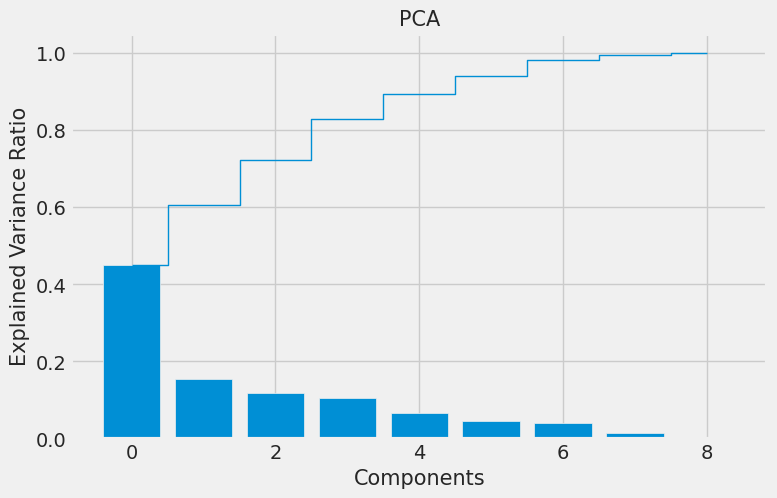

In [ ]:
#perform PCA for dimensionality reduction
scaler = StandardScaler().fit(df_train[target_features["BTC_Close"]])
X_1 = scaler.transform(df_train[target_features["BTC_Close"]])
estimator_pca = PCA(n_components=None)
estimator_pca.fit_transform(X_1)
evr = estimator_pca.explained_variance_ratio_ 
cumsum_ev = np.cumsum(evr)
plt.figure(figsize=(8, 5))

plt.bar(range(len(evr)), evr, align='center', label='Component explained variance')
plt.step(range(len(cumsum_ev)), cumsum_ev, where='mid',label='Cumulative explained variance', linewidth=1)

plt.title("PCA", fontsize=15)
plt.xlabel("Components",fontsize=15)
plt.ylabel("Explained Variance Ratio",fontsize=15)
plt.show()

In [ ]:
#PCA of BTC
targets=["BTC_Close"]
feature=target_features["BTC_Close"]
# feature=df.columns
target_result={}
target_history={}
target_rmse={}
window_size=65
batch_size=30
epochs=30
pca=True
for target in targets:
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, feature, pca, window_size, batch_size, epochs) 
all_result['Multivariate_PCA']=target_result
all_history['Multivariate_PCA']=target_history
all_rmse['Multivariate_PCA']=target_rmse

Epoch 1/30
29/29 [==============================] - 11s 219ms/step - loss: 0.2048 - val_loss: 0.5002
Epoch 2/30
29/29 [==============================] - 4s 152ms/step - loss: 0.0388 - val_loss: 0.4133
Epoch 3/30
29/29 [==============================] - 5s 156ms/step - loss: 0.0207 - val_loss: 0.3798
Epoch 4/30
29/29 [==============================] - 6s 203ms/step - loss: 0.0174 - val_loss: 0.4300
Epoch 5/30
29/29 [==============================] - 5s 161ms/step - loss: 0.0151 - val_loss: 0.5156
Epoch 6/30
29/29 [==============================] - 6s 202ms/step - loss: 0.0143 - val_loss: 0.5198
Epoch 7/30
29/29 [==============================] - 4s 126ms/step - loss: 0.0120 - val_loss: 0.5458
Epoch 8/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0113 - val_loss: 0.5177
Epoch 9/30
29/29 [==============================] - 2s 72ms/step - loss: 0.0123 - val_loss: 0.6609
Epoch 10/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0129 - val_loss: 0.5892
E

As seen from plotting the prediction values against the actual values, the multivariate prediction is not performing too well towards the end.

### without PCA

In [ ]:
#Multivariate of BTC
#Just a quick look to what will happen
targets=["BTC_Close"]
feature=target_features["BTC_Close"]
target_result={}
target_history={}
target_rmse={}
window_size=65
batch_size=30
epochs=30
pca=False
for target in targets:
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, feature, pca, window_size, batch_size, epochs) 
all_result['Multivariate']=target_result
all_history['Multivariate']=target_history
all_rmse['Multivariate']=target_rmse


Epoch 1/30
29/29 [==============================] - 7s 103ms/step - loss: 0.1609 - val_loss: 0.0821
Epoch 2/30
29/29 [==============================] - 2s 71ms/step - loss: 0.0292 - val_loss: 0.3001
Epoch 3/30
29/29 [==============================] - 3s 102ms/step - loss: 0.0182 - val_loss: 0.2636
Epoch 4/30
29/29 [==============================] - 3s 108ms/step - loss: 0.0149 - val_loss: 0.2242
Epoch 5/30
29/29 [==============================] - 2s 72ms/step - loss: 0.0123 - val_loss: 0.3717
Epoch 6/30
29/29 [==============================] - 2s 72ms/step - loss: 0.0108 - val_loss: 0.3197
Epoch 7/30
29/29 [==============================] - 2s 71ms/step - loss: 0.0099 - val_loss: 0.3090
Epoch 8/30
29/29 [==============================] - 3s 90ms/step - loss: 0.0110 - val_loss: 0.3511
Epoch 9/30
29/29 [==============================] - 3s 105ms/step - loss: 0.0105 - val_loss: 0.4074
Epoch 10/30
29/29 [==============================] - 3s 102ms/step - loss: 0.0129 - val_loss: 0.4133
Epoc

## Results

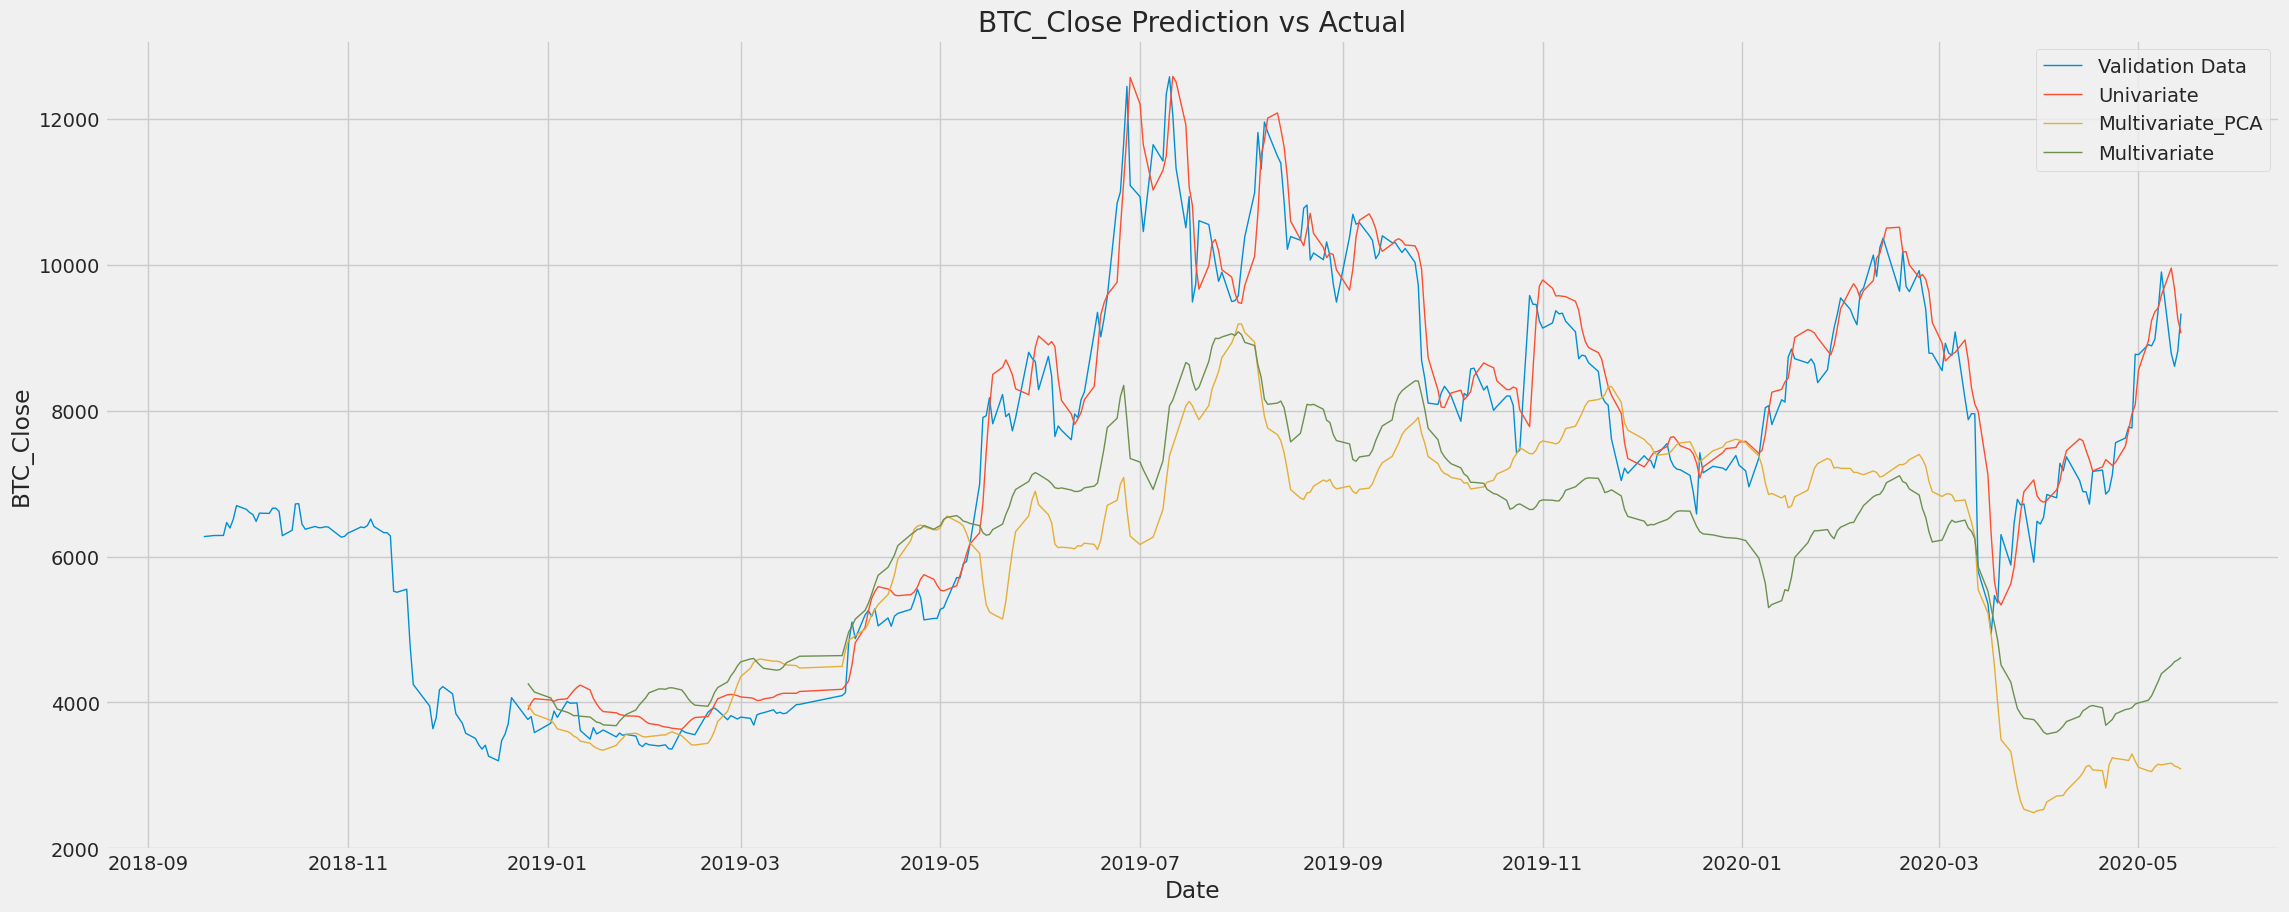

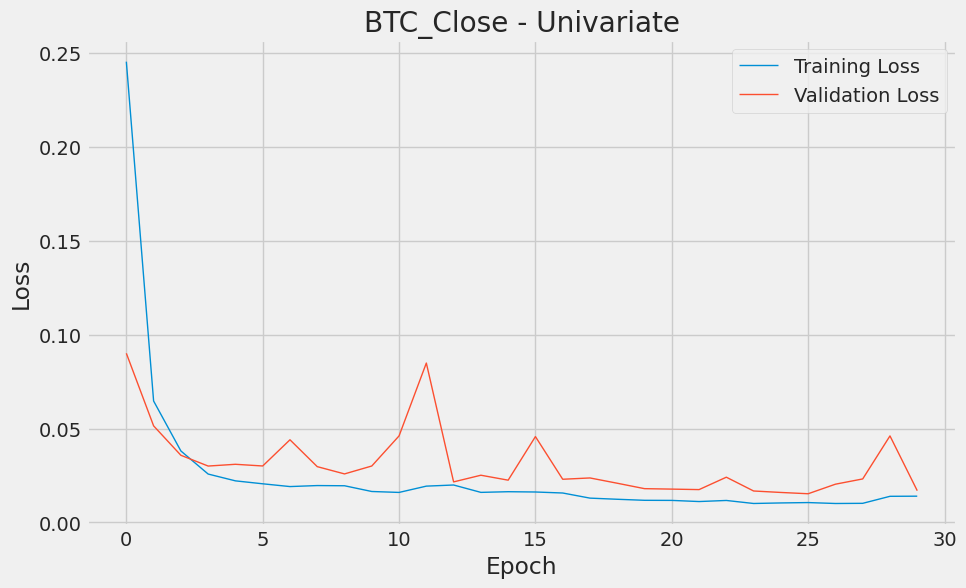

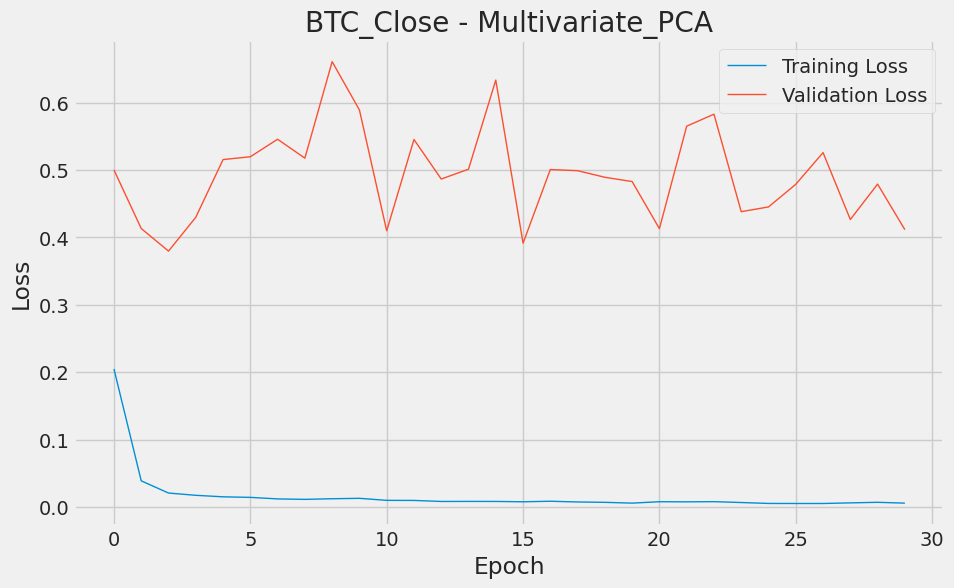

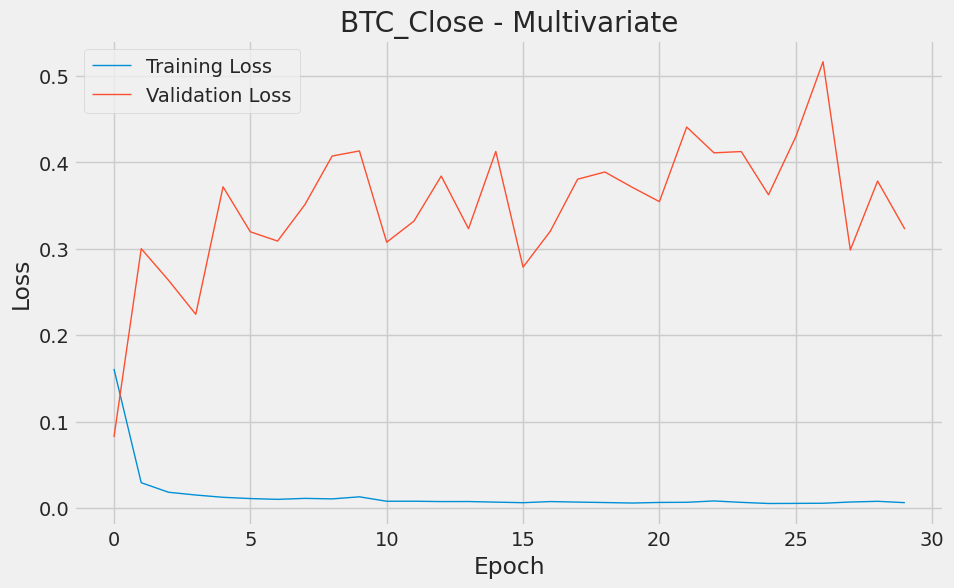

In [ ]:
plot_prediction(all_result,df_test,targets)
plot_history(all_history,targets)

In [ ]:
pd.DataFrame(all_rmse)

,Univariate,Multivariate_PCA,Multivariate
BTC_Close,490.804102,2424.410062,2146.919694


# Repeat with BTC, Gold, Oil, VIX and SP500 index

## Univariate with BTC, Gold, Oil, VIX and SP500 index

In [ ]:
all_result={}
all_history={}
all_rmse={}

In [ ]:
#Only close price of BTC/GOLD/OIL/VIX/SP500
targets=["BTC_Close" ,'gold_Close', 'oil_Close','VIX_Close','SP500_Close index']
target_result={}
target_history={}
target_rmse={}
window_size=65
batch_size=30
epochs=30
pca=False
for target in targets:
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, [target], pca, window_size, batch_size, epochs) 
all_result['Univariate'] = target_result
all_history['Univariate']=target_history
all_rmse['Univariate']=target_rmse

Epoch 1/30
29/29 [==============================] - 8s 107ms/step - loss: 0.1833 - val_loss: 0.0490
Epoch 2/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0540 - val_loss: 0.0410
Epoch 3/30
29/29 [==============================] - 3s 88ms/step - loss: 0.0342 - val_loss: 0.0376
Epoch 4/30
29/29 [==============================] - 3s 119ms/step - loss: 0.0263 - val_loss: 0.0331
Epoch 5/30
29/29 [==============================] - 2s 74ms/step - loss: 0.0262 - val_loss: 0.0298
Epoch 6/30
29/29 [==============================] - 2s 76ms/step - loss: 0.0220 - val_loss: 0.0334
Epoch 7/30
29/29 [==============================] - 2s 74ms/step - loss: 0.0203 - val_loss: 0.0508
Epoch 8/30
29/29 [==============================] - 3s 113ms/step - loss: 0.0203 - val_loss: 0.0274
Epoch 9/30
29/29 [==============================] - 5s 192ms/step - loss: 0.0191 - val_loss: 0.0251
Epoch 10/30
29/29 [==============================] - 4s 137ms/step - loss: 0.0179 - val_loss: 0.0270
Epoc

## Multivariate with BTC, Gold, Oil, VIX and SP500 index

In [ ]:
#PCA of BTC/GOLD/OIL/VIX/SP500
targets=["BTC_Close" ,'gold_Close', 'oil_Close','VIX_Close','SP500_Close index']
target_result={}
target_history={}
target_rmse={}
window_size=65
batch_size=30
epochs=30
pca=True
for target in targets:
  feature=target_features[target]
  #df_train, df_test, target, features, pca, window_size, batch_size, epochs
  target_result[target], target_history[target], target_rmse[target] = train_test_model(df_train, df_test, target, feature, pca, window_size, batch_size, epochs) 
all_result['Multivariate_PCA']=target_result
all_history['Multivariate_PCA']=target_history
all_rmse['Multivariate_PCA']=target_rmse

Epoch 1/30
29/29 [==============================] - 8s 107ms/step - loss: 0.1988 - val_loss: 0.3030
Epoch 2/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0326 - val_loss: 0.3386
Epoch 3/30
29/29 [==============================] - 2s 72ms/step - loss: 0.0199 - val_loss: 0.2971
Epoch 4/30
29/29 [==============================] - 2s 72ms/step - loss: 0.0172 - val_loss: 0.2980
Epoch 5/30
29/29 [==============================] - 3s 97ms/step - loss: 0.0146 - val_loss: 0.3558
Epoch 6/30
29/29 [==============================] - 3s 114ms/step - loss: 0.0138 - val_loss: 0.3290
Epoch 7/30
29/29 [==============================] - 2s 71ms/step - loss: 0.0116 - val_loss: 0.3558
Epoch 8/30
29/29 [==============================] - 2s 72ms/step - loss: 0.0108 - val_loss: 0.3368
Epoch 9/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0129 - val_loss: 0.4575
Epoch 10/30
29/29 [==============================] - 2s 73ms/step - loss: 0.0184 - val_loss: 0.3798
Epoch 1

## Results

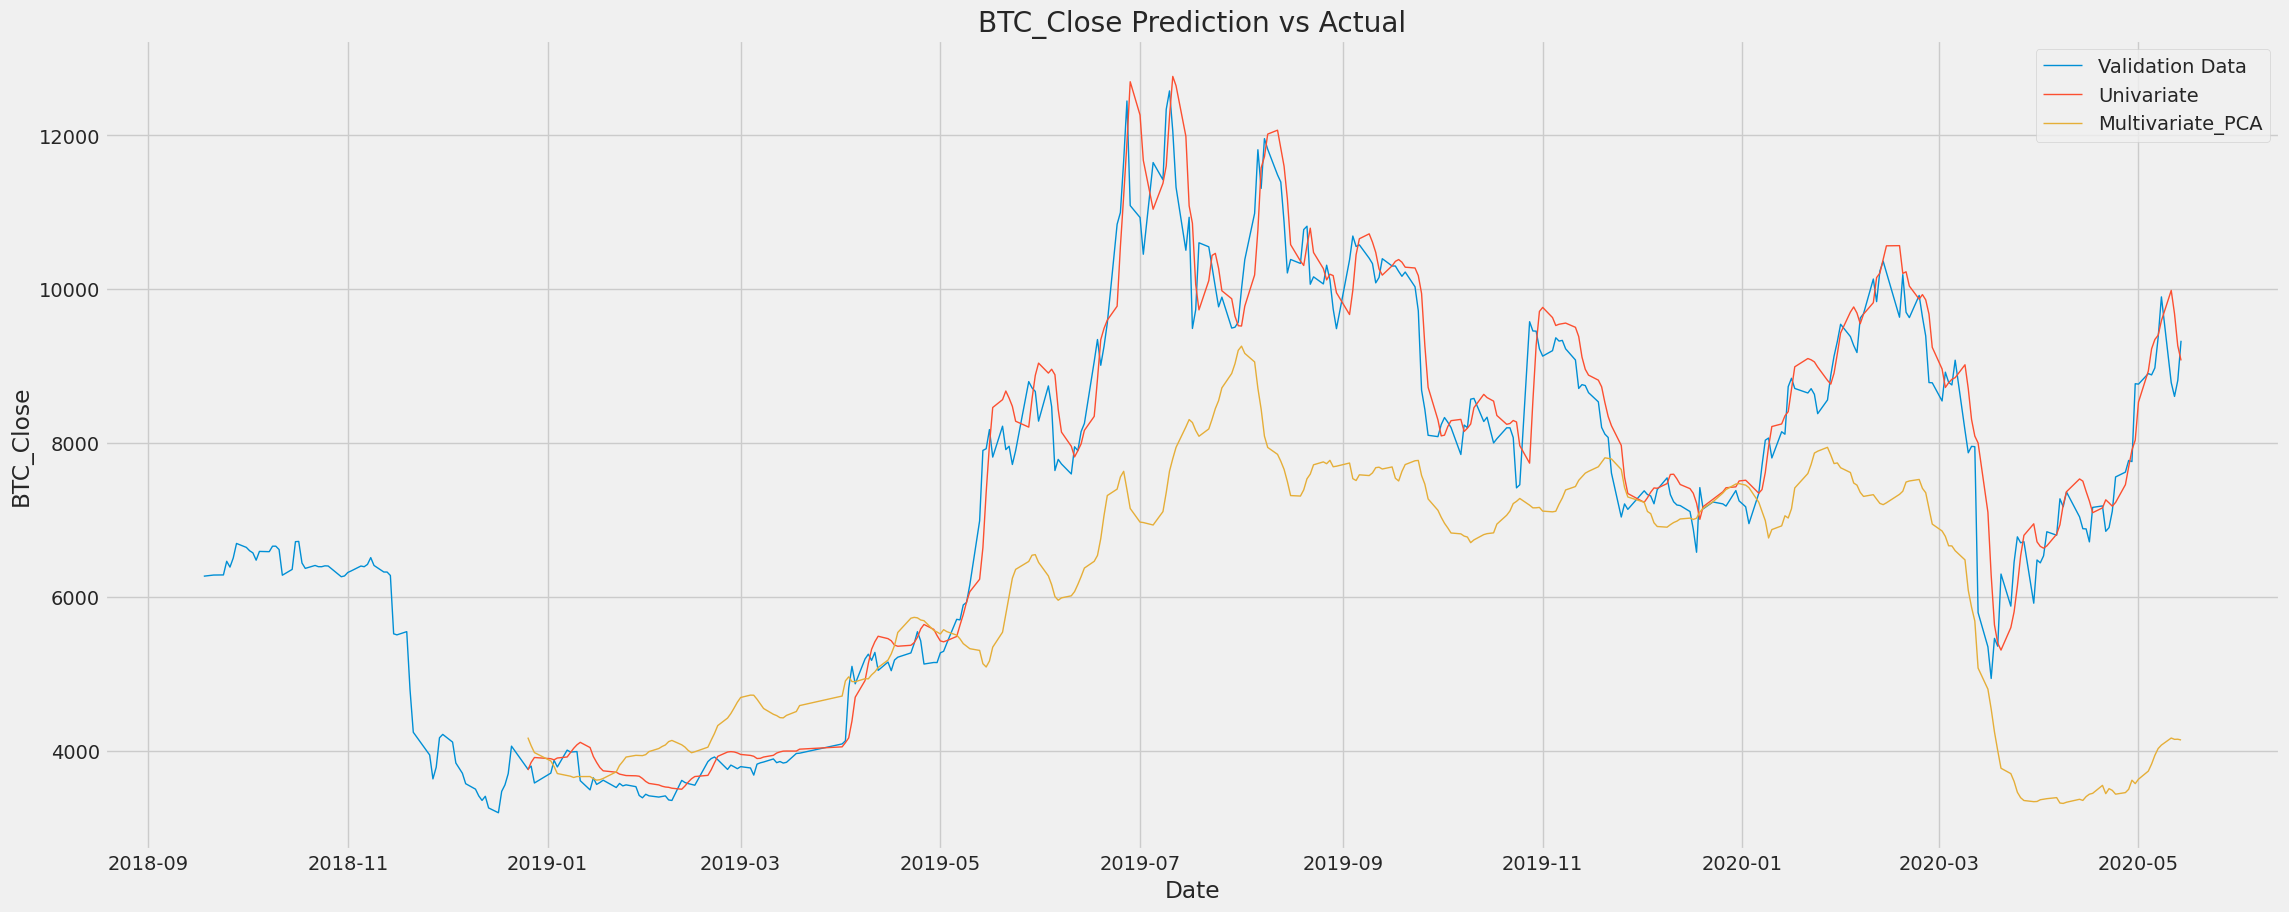

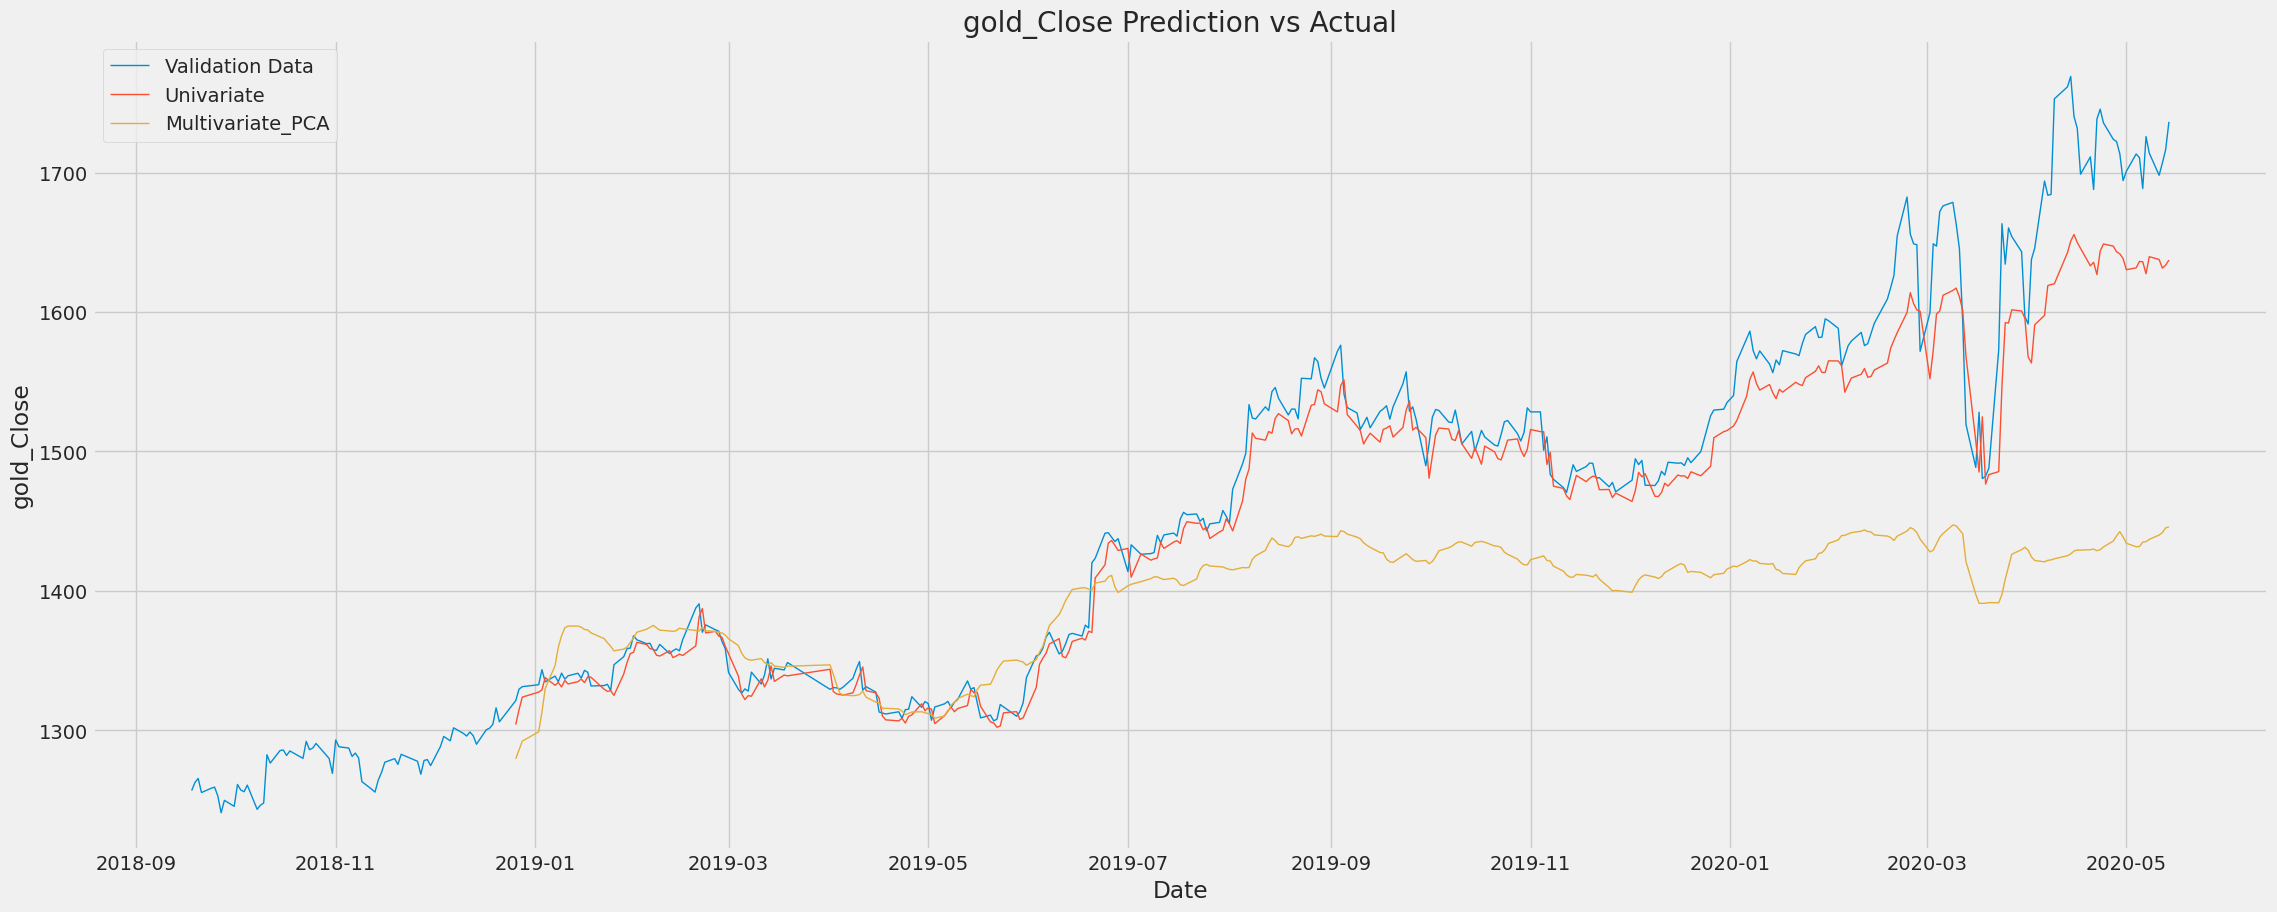

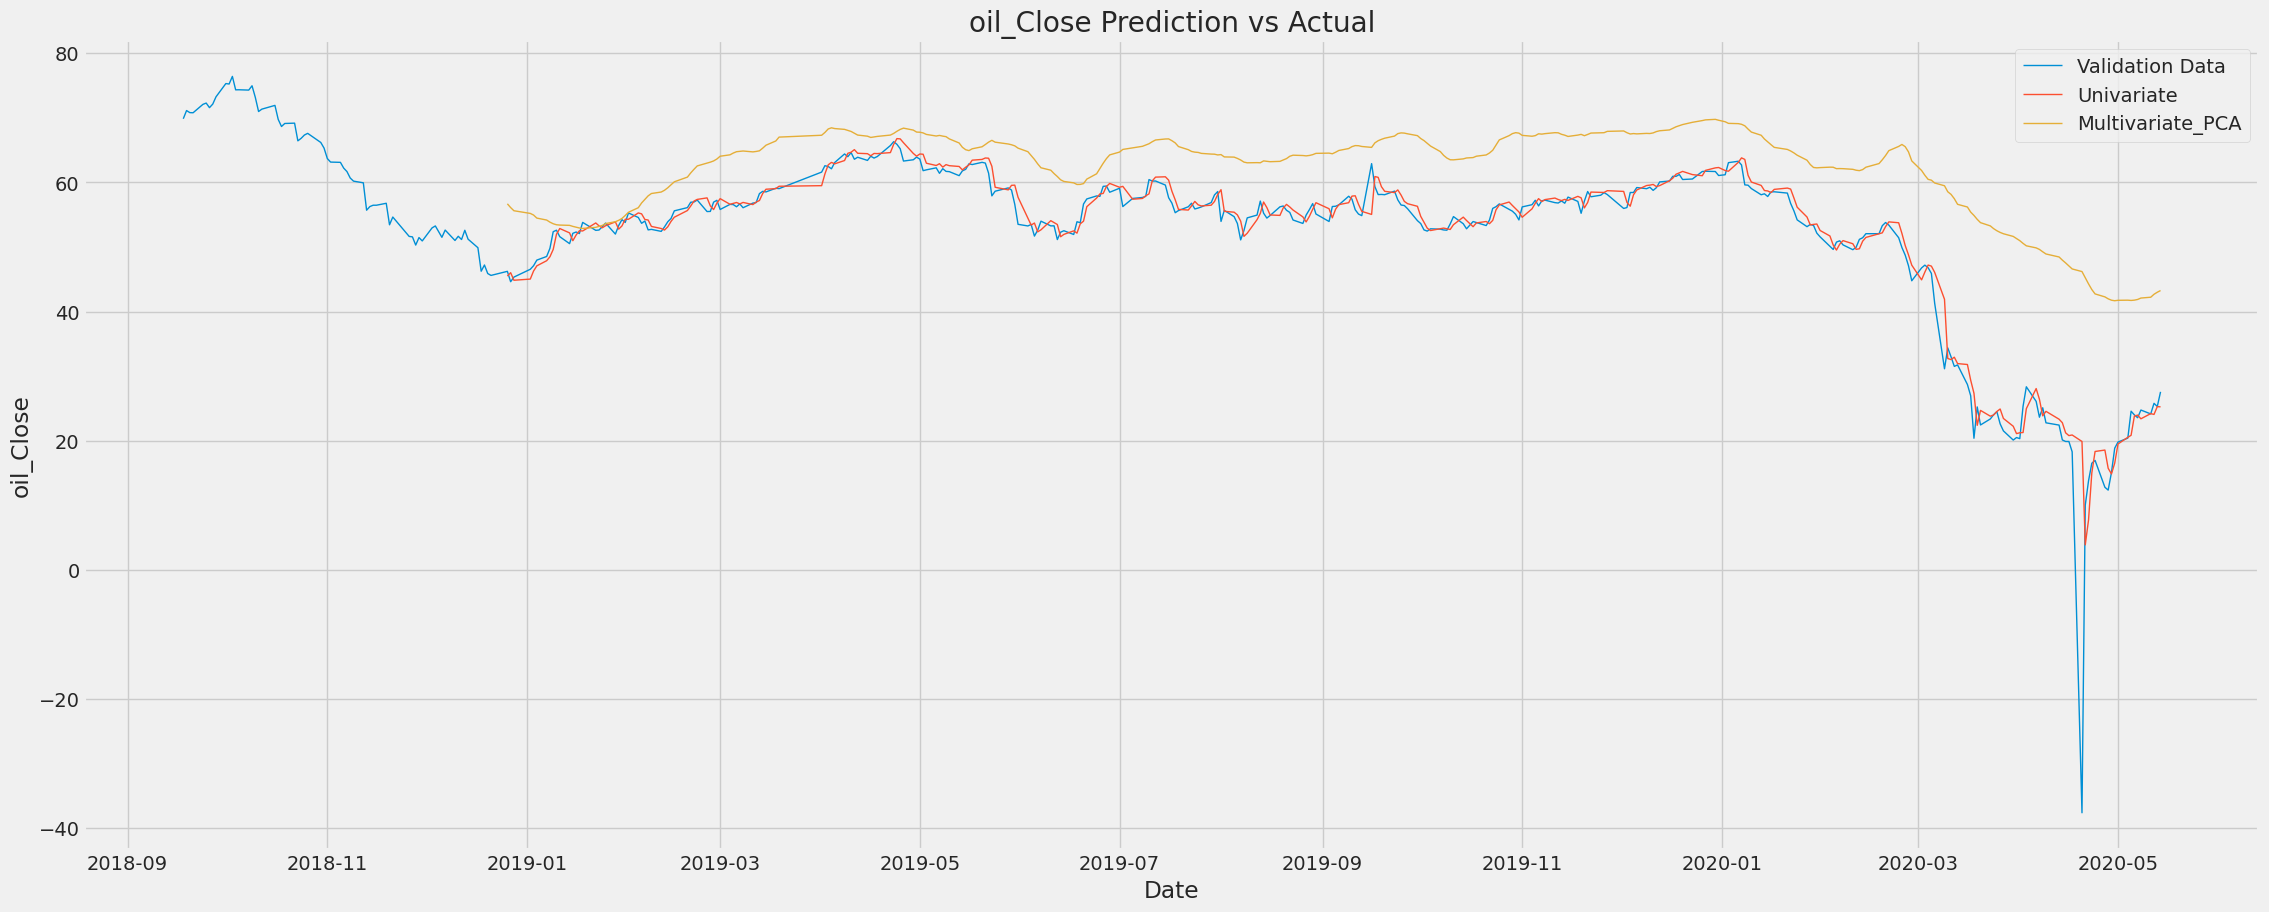

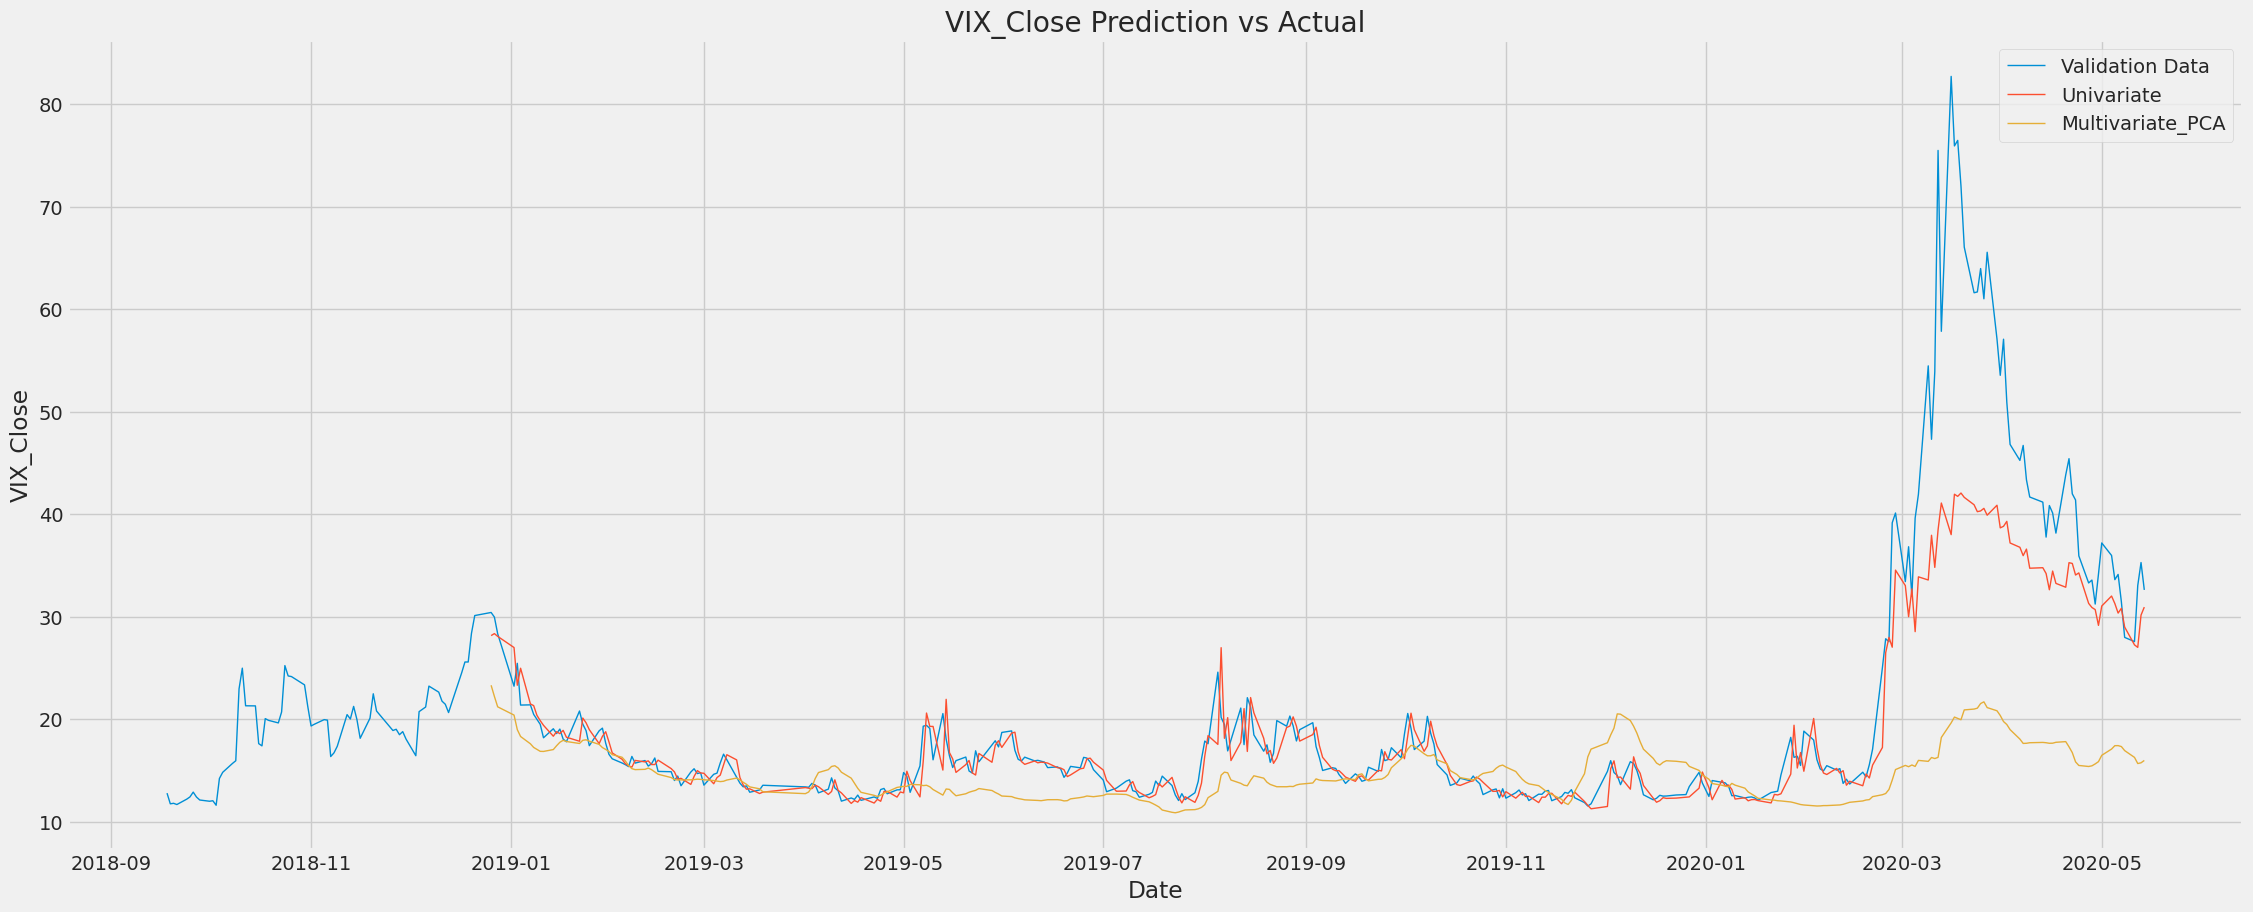

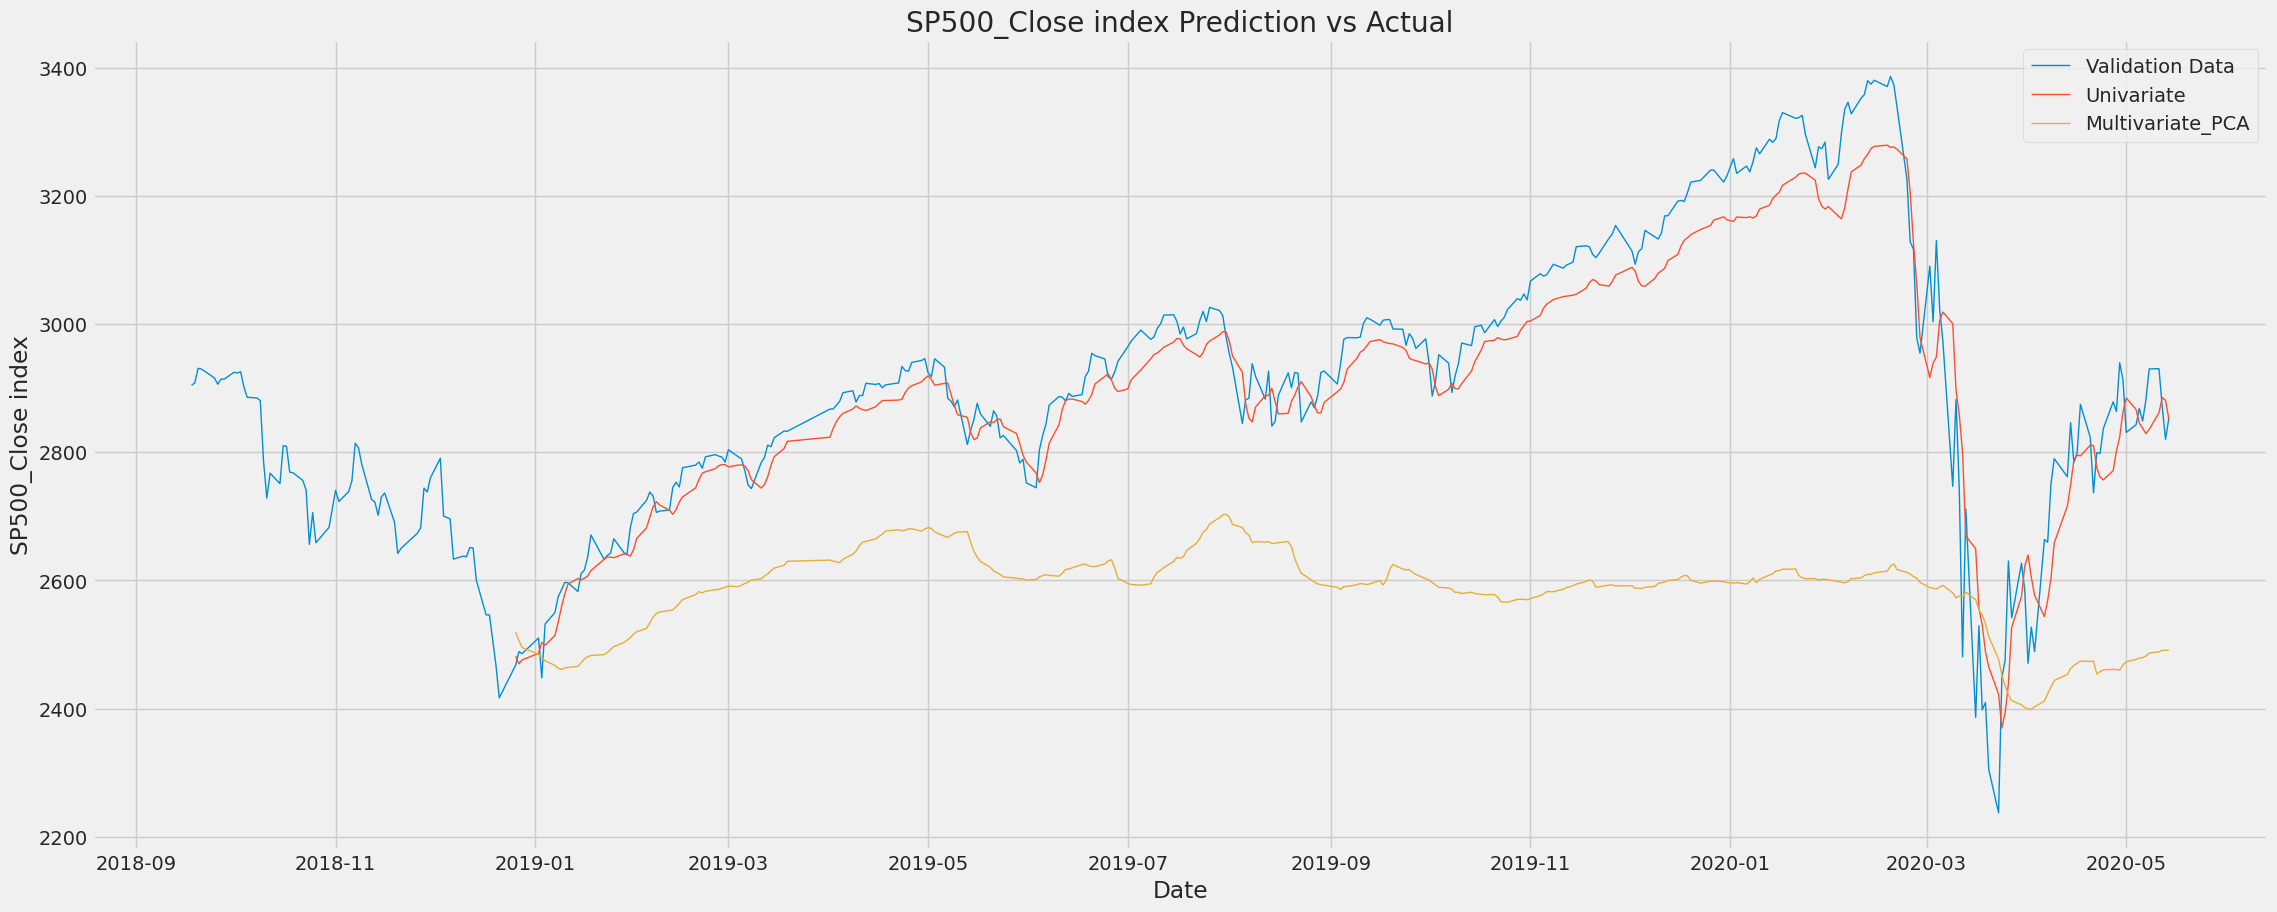

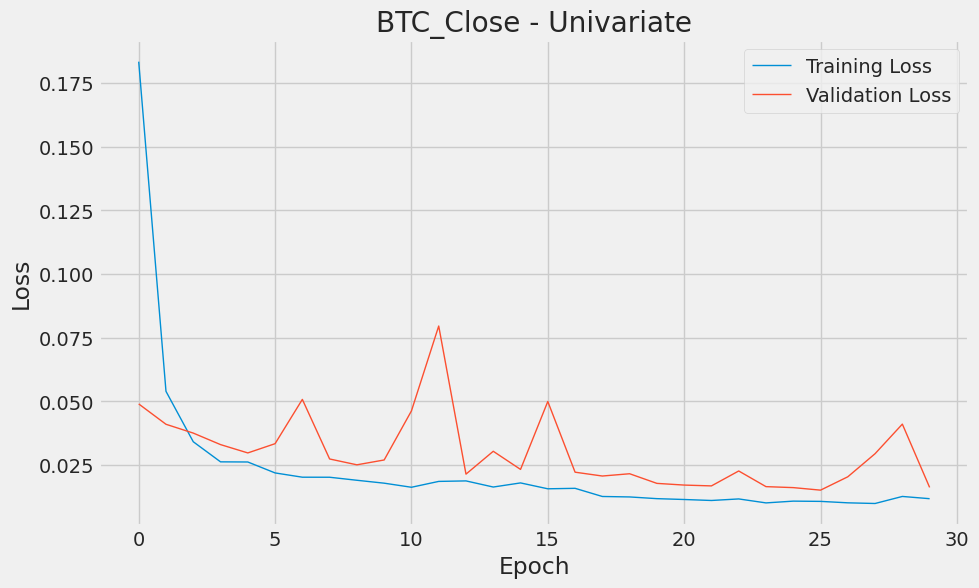

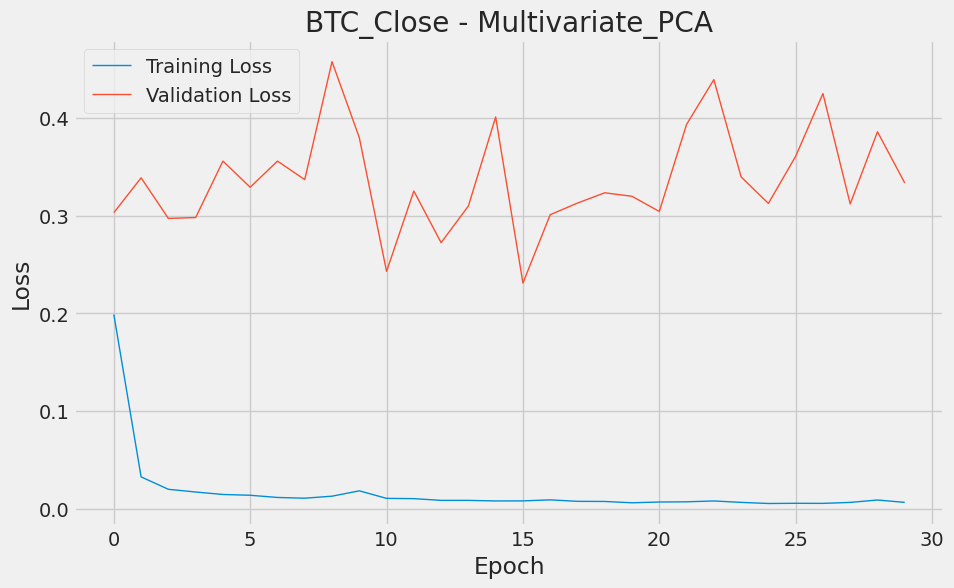

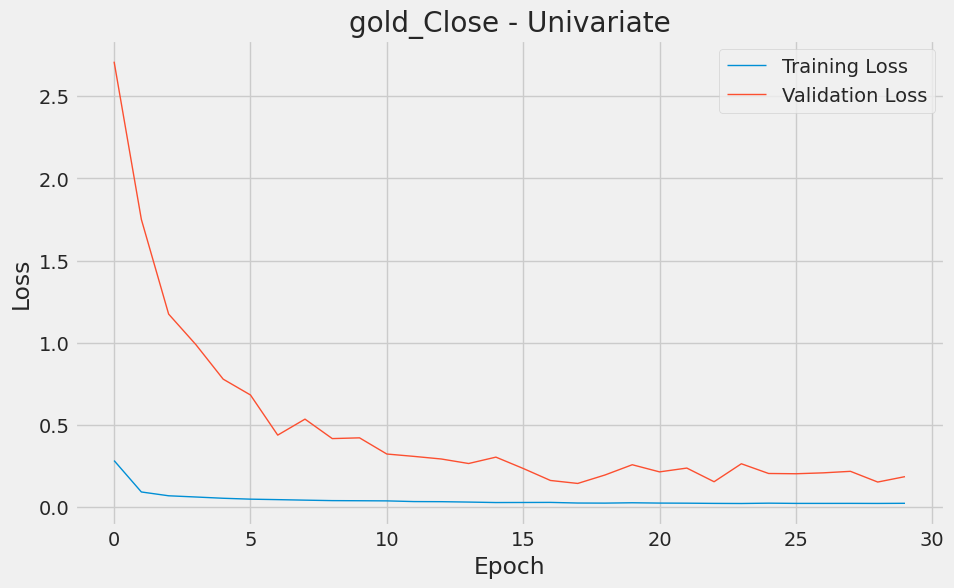

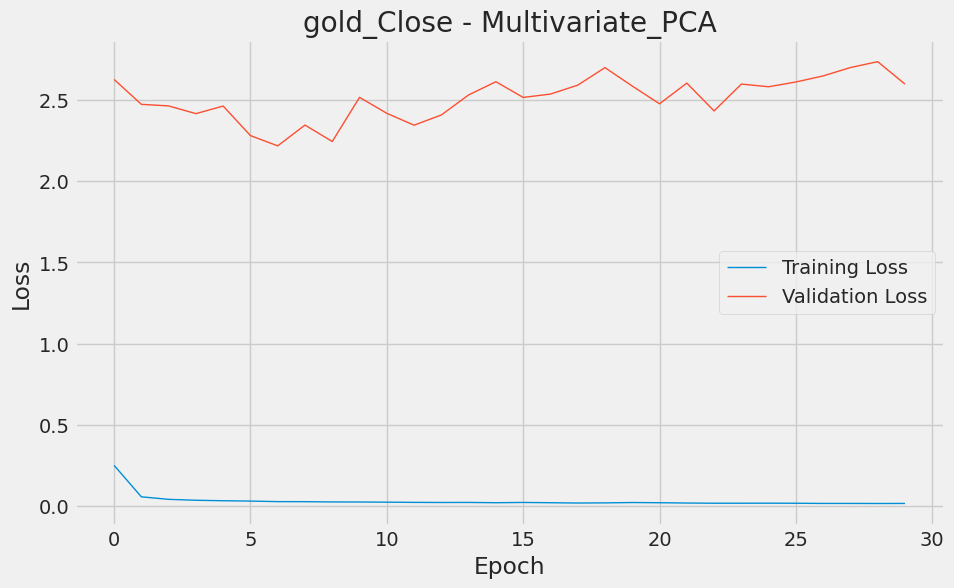

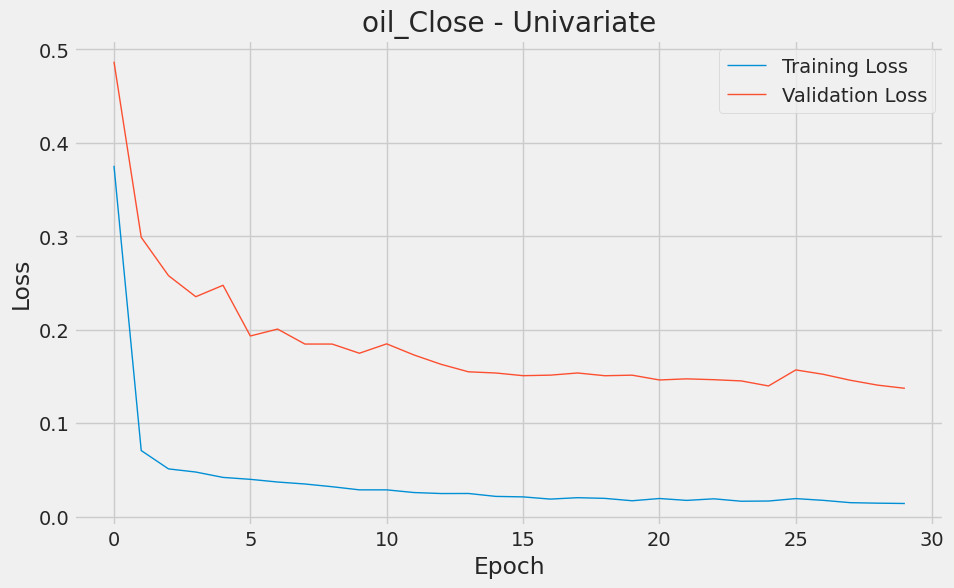

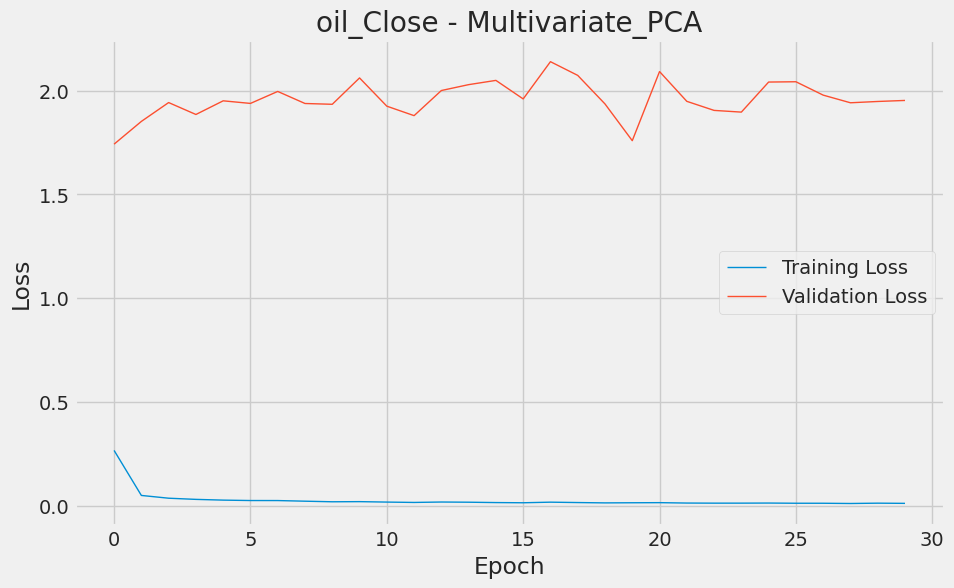

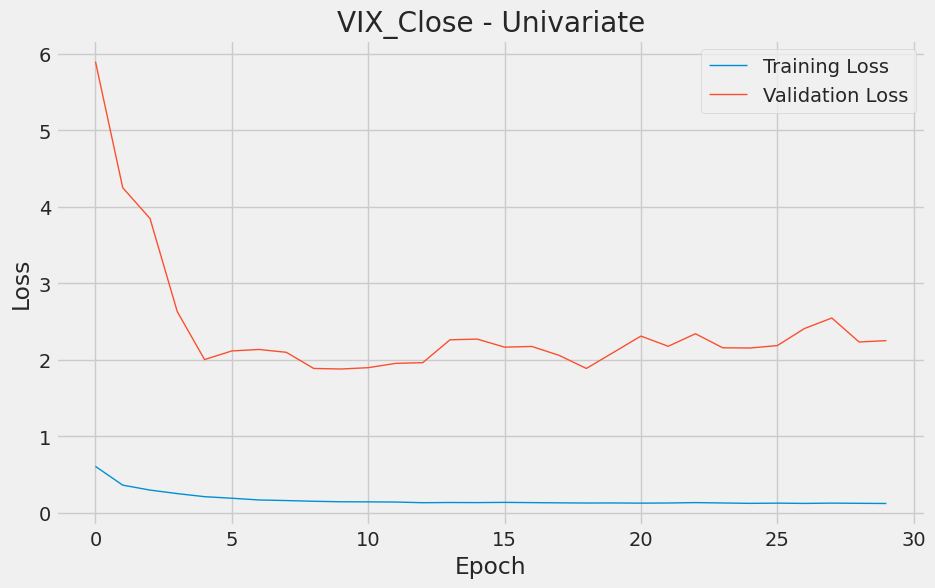

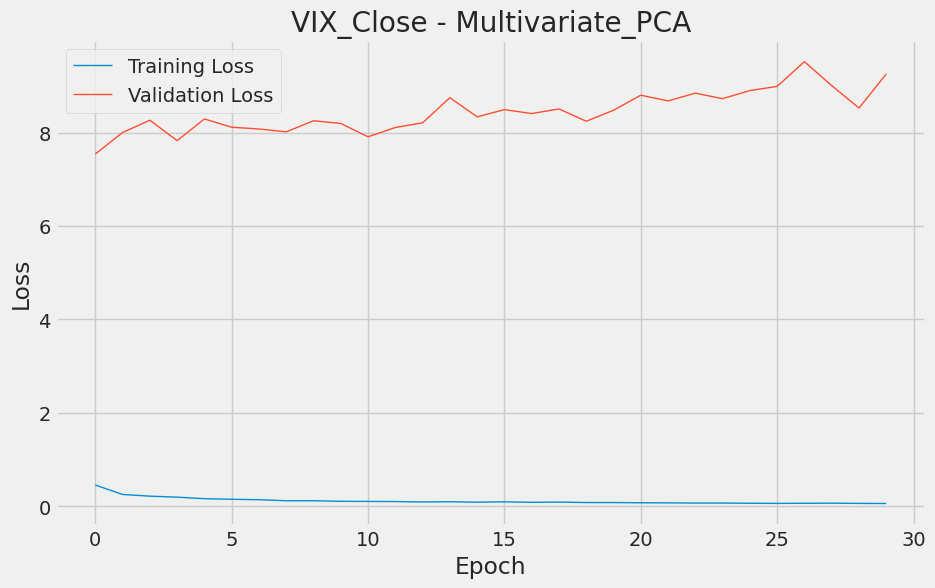

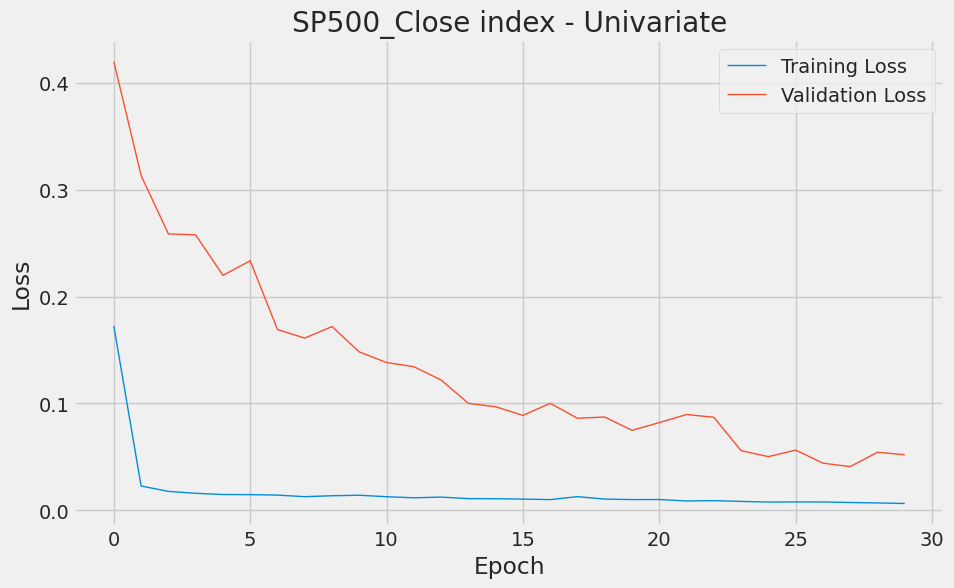

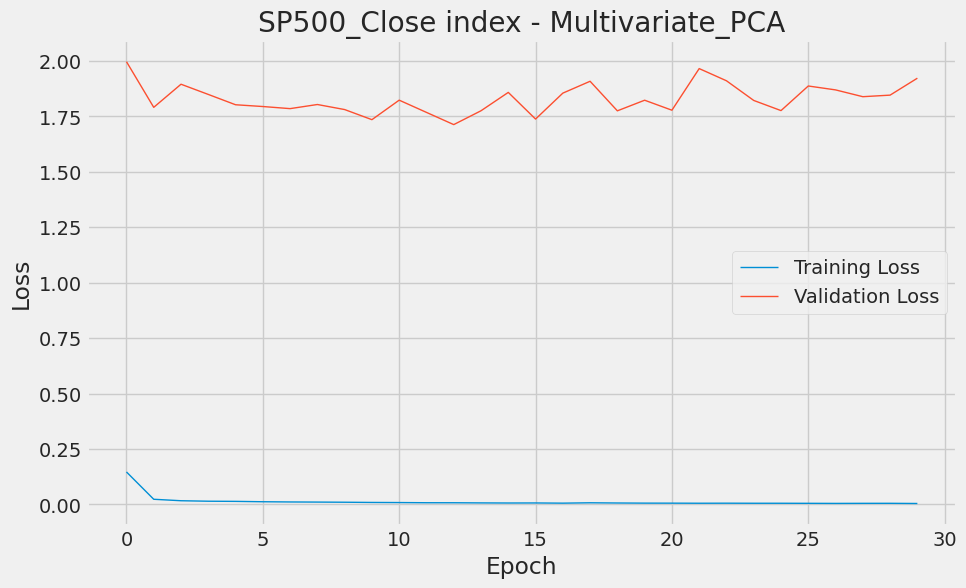

In [ ]:
plot_prediction(all_result,df_test,targets)
plot_history(all_history,targets)

In [ ]:
pd.DataFrame(all_rmse)

,Univariate,Multivariate_PCA
BTC_Close,482.013185,2182.150932
gold_Close,33.126505,124.299691
oil_Close,3.564982,13.443179
VIX_Close,6.442246,13.059618
SP500_Close index,64.359802,391.292357


## Try using ARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00


In [ ]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from pmdarima.arima import auto_arima

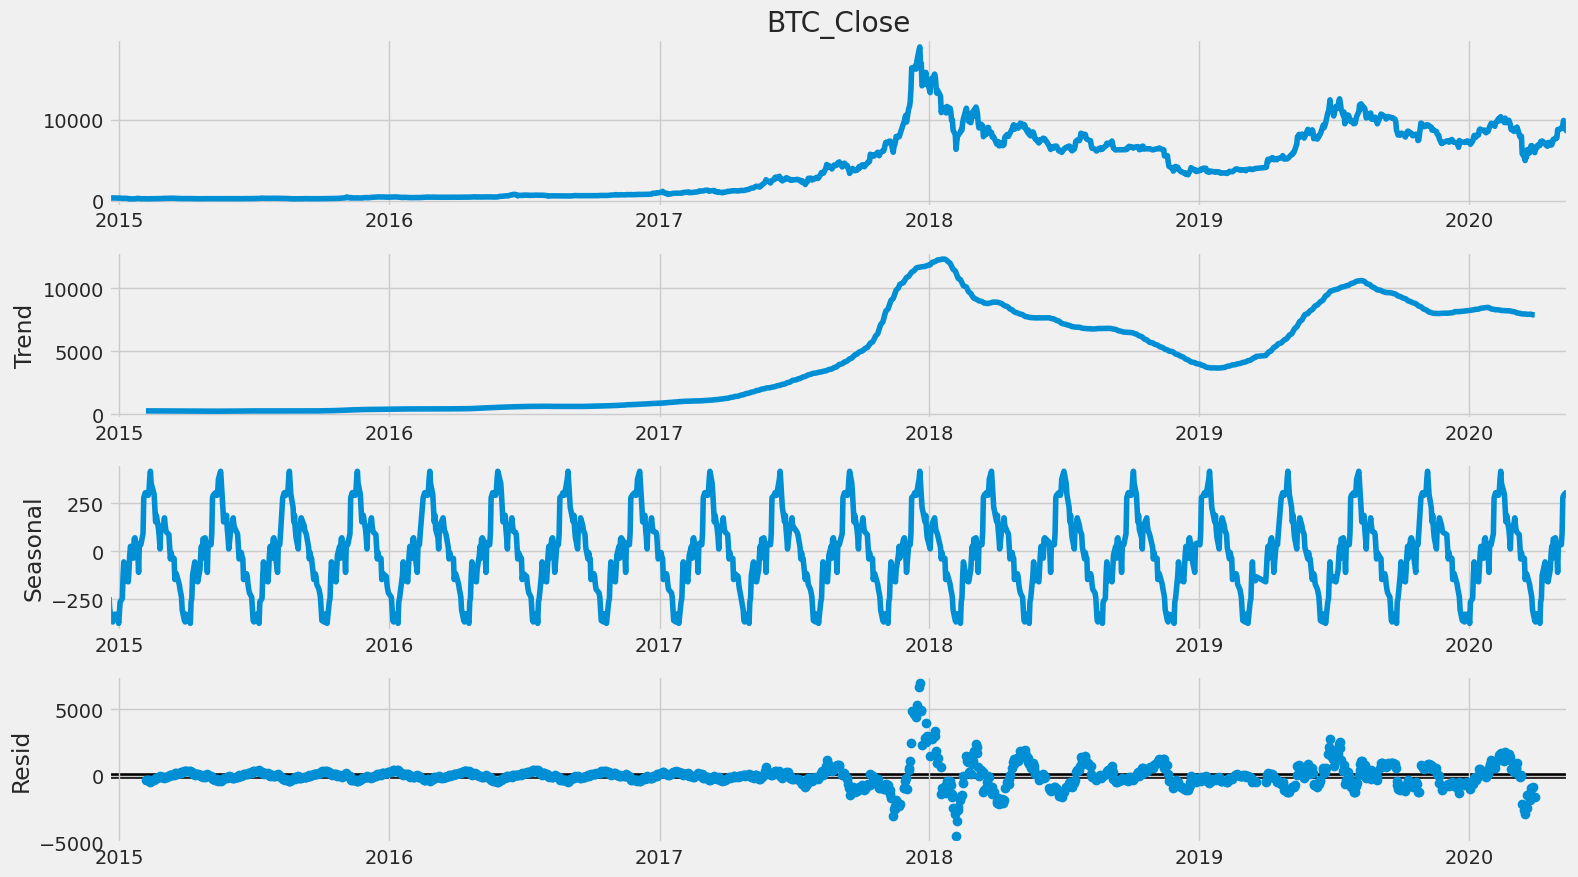

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=65) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
#from above graphs, there is some sort of seasonality at period= 65,90,180,365, we can take 65 as the period input
from pmdarima.arima import ADFTest
#Augmented Dicky Fuller Test
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df['BTC_Close'])
#result show that the dataset is not stationary, a common method to solve this is by differencing

(0.16244867538104052, True)

In [ ]:
#difference by 1
adf_test.should_diff(df['BTC_Close'].diff().dropna())

(0.01, False)

In [ ]:
# # Determine hyperparameters using auto-arima
# model = auto_arima(df_train['BTC_Close'], start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5,  
#                    start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
#                    seasonal=True, m=60, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)
# print(model.summary())
#somehow very slow

In [ ]:
history_ARIMA = [x for x in df_train['BTC_Close']]
predictions_ARIMA = []

predict_day=0
#Rolling #Fit every time there is new input
for i in range(len(df_test)):
    model = ARIMA(history_ARIMA, order=(3,1,3))
    model = model.fit()
    y_pred1 = (model.forecast())[0]
    predictions_ARIMA.append(y_pred1)
    obs = df_test['BTC_Close'][i]
    history_ARIMA.append(obs)


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

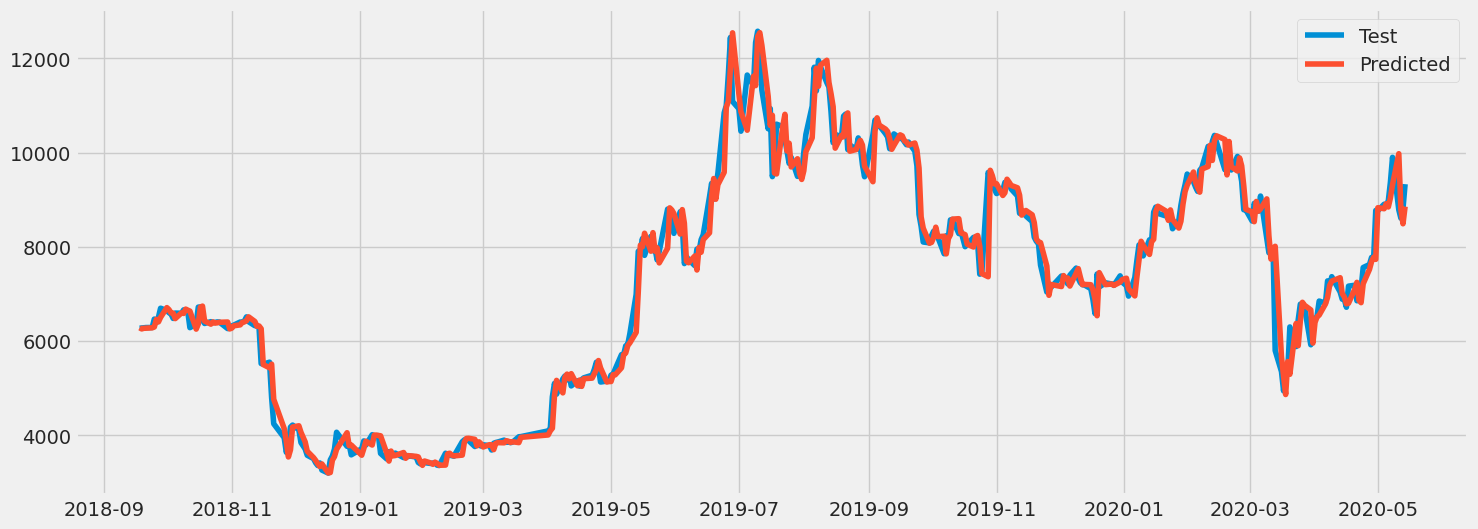

In [ ]:
y_pred_ARIMA =  pd.DataFrame(predictions_ARIMA, index=df_test.index) 
#show prediction and test for comparison
plt.figure(figsize=(16,6))
# plt.plot(df_train['BTC_Close'], label='Train')
plt.plot(df_test['BTC_Close'], label='Test')
plt.plot(y_pred_ARIMA, label='Predicted')

plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(np.mean(((y_pred_ARIMA[0] - df_test['BTC_Close']) ** 2)))
rmse

365.77162103486523

# Try XGBoost

In [64]:
#Prepare data (Rolling widow)
def XGB_split_data(window_size, data_X, data_y):
    X = []
    y = []
    for i in range(len(data_X)-window_size):
      X.append(np.array(data_X)[i:i+window_size,0:].ravel())
      y.append(np.array(data_y)[i+window_size,0])
    return np.array(X), np.array(y)

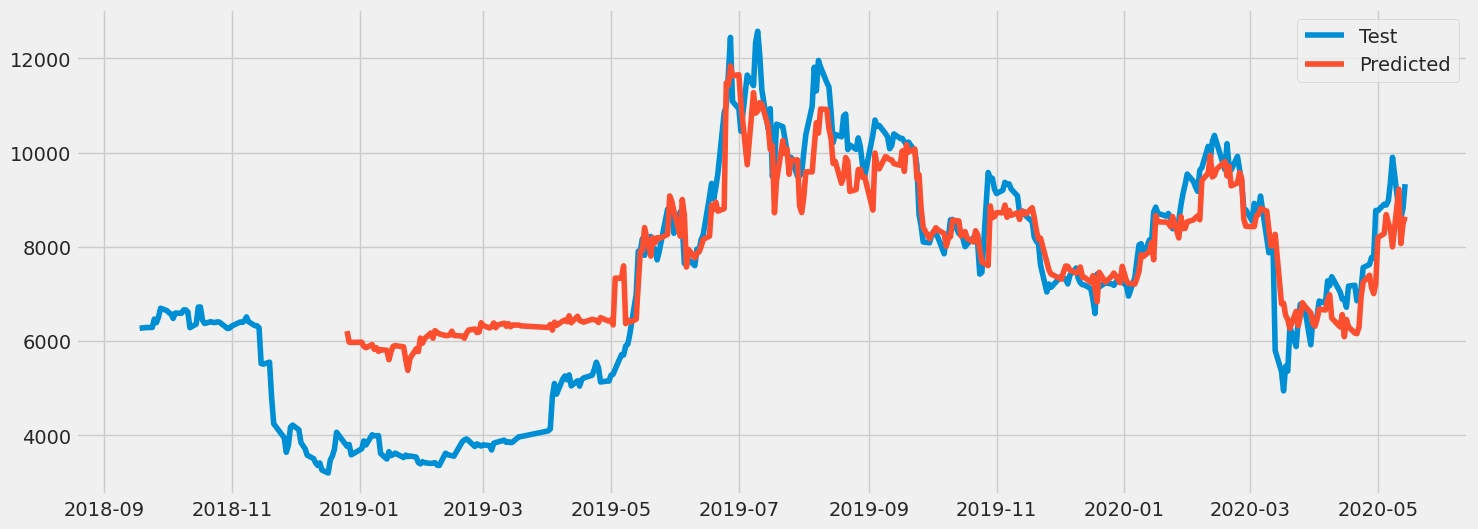

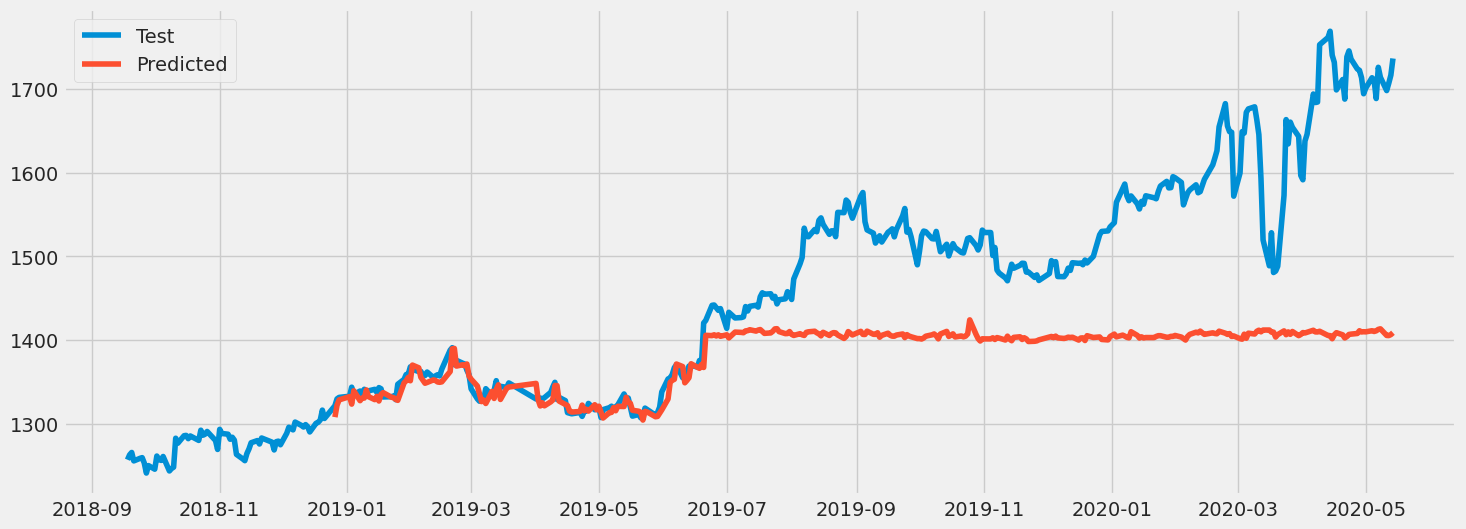

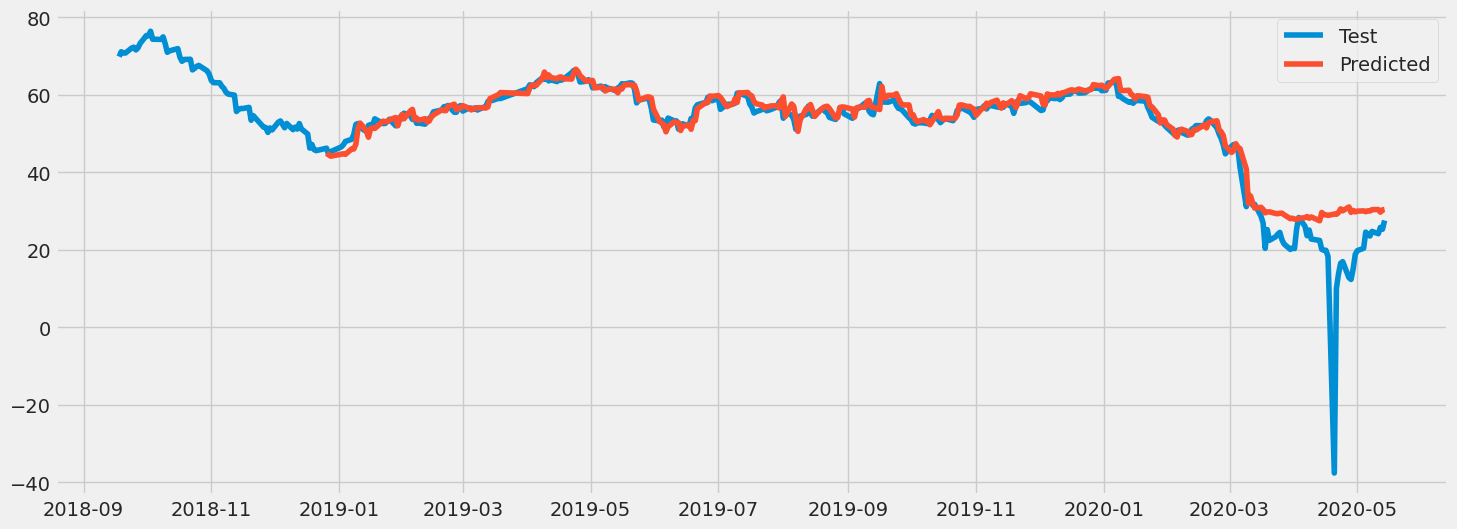

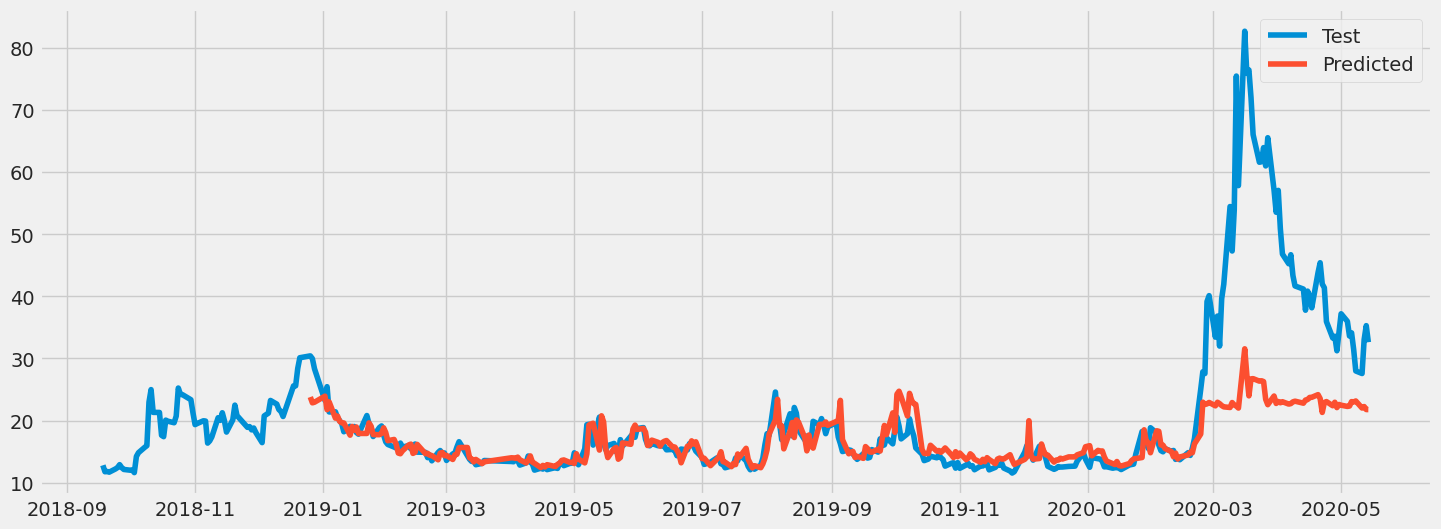

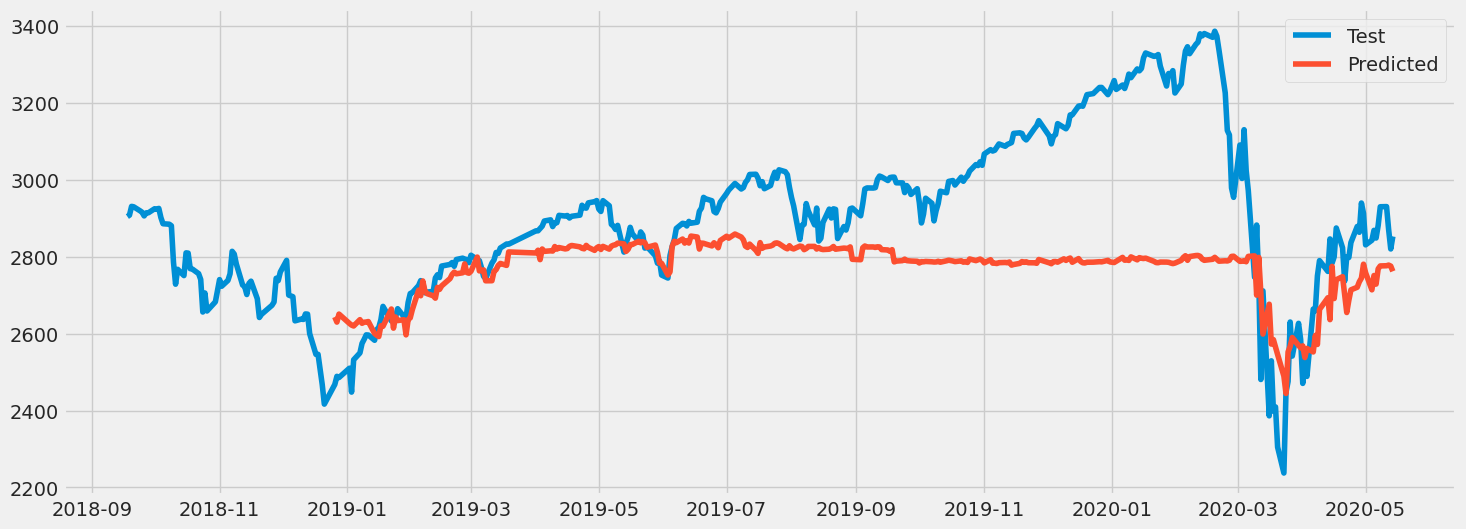

In [71]:
import xgboost as xgb

#BTC/GOLD/OIL/VIX/SP500
targets=["BTC_Close" ,'gold_Close', 'oil_Close','VIX_Close','SP500_Close index']
# targets=["BTC_Close"]
# target_result={}
# target_history={}
# target_rmse={}
window_size=65
pca=True

for target in targets:
  feature=target_features[target]

  X_train, X_test = df_train[feature], df_test[feature]
  y_train, y_test = df_train[[target]], df_test[[target]]
  
  #standardise before any other transformation action
  #can use just one scaler for X and y, it only applies to each feature, but this is clearer
  # X_scaler = StandardScaler().fit(X_train)
  # y_scaler = StandardScaler().fit(y_train)
  # X_train = X_scaler.transform(X_train)
  # X_test = X_scaler.transform(X_test)
  # y_train = y_scaler.transform(y_train)
  # y_test = y_scaler.transform(y_test)
  
  # if pca:
  #   X_train, X_test = perform_pca(X_train, X_test)
  X_train, y_train = XGB_split_data(window_size, X_train, y_train)
  X_test, y_test = XGB_split_data(window_size, X_test, y_test)

  # # reshaping array
  # X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
  # y_train = y_train[:, np.newaxis]     
  # X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
  # y_test = y_test[:, np.newaxis]

  # Train the model
  XGB_model = xgb.XGBRegressor(n_estimators=100,  learning_rate=0.1, objective='reg:squarederror')
  XGB_model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = XGB_model.predict(X_test)

  y_pred =  pd.DataFrame((y_pred), index=df_test.index[window_size:]) 
  # y_actual=  pd.DataFrame(y_scaler.inverse_transform(y_test), index=df_test.index[window_size:]) 
  # Get the root mean squared error (RMSE)
  # rmse = np.sqrt(np.mean(((y_pred[0] - y_actual[0]) ** 2)))

  # print('RMSE: {:.2f}'.format(rmse))

  plt.figure(figsize=(16,6))
  # plt.plot(df_train['BTC_Close'], label='Train')
  plt.plot(df_test[target], label='Test')
  plt.plot(y_pred, label='Predicted')

  plt.legend()
  plt.show()
  del XGB_model
